# Agricultural Intelligence for Kenya Agricultural Research Institute (KARI)

##  Business Context

**Kenya Agricultural Research Institute (KARI)** is the leading agricultural research organization in Kenya, responsible for developing and promoting agricultural technologies to enhance food security and farmer livelihoods across the nation. Agriculture is the backbone of Kenya's economy, employing over 40% of the population and contributing significantly to GDP.

KARI has been collecting comprehensive data on crop production, weather patterns, and market prices across different counties in Kenya over several years. However, the institute faces critical challenges:

- **Seasonal Uncertainty**: Farmers need better guidance on optimal planting times and crop selection
- **Yield Prediction**: Inability to accurately forecast crop yields affects food security planning
- **Climate Variability**: Understanding the impact of rainfall and temperature on different crops
- **Market Volatility**: Price fluctuations make it difficult for farmers to plan and maximize profits
- **Resource Optimization**: Determining optimal fertilizer usage for different crops and conditions
- **Regional Variations**: Different counties have different agricultural potential and challenges


**Project goal:** Analyze time series data to uncover insights that can improve agricultural planning, enhance food security, and support farmer decision-making.

---

##  Dataset Description

You have been provided access to KARI's agricultural database in a CSV file named `kenyan_agriculture_data.csv` containing multi-year agricultural data across Kenyan counties.

### Data Fields:
- **Date**: Monthly timestamp of the observation
- **County**: Kenyan county (e.g., Nakuru, Kisumu, Meru, etc.)
- **Crop**: Type of crop (Maize, Wheat, Rice, Beans, etc.)
- **Yield_Tons**: Crop yield in metric tons
- **Rainfall_mm**: Monthly rainfall in millimeters
- **Temperature_C**: Average monthly temperature in Celsius
- **Price_KSH_per_kg**: Market price in Kenyan Shillings per kilogram
- **Area_Planted_Hectares**: Area planted in hectares
- **Fertilizer_Used_kg**: Amount of fertilizer used in kilograms

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from datetime import datetime
import warnings


## Load dataset

In [2]:
df = pd.read_csv('kenyan_agriculture_data.csv')
df.head(3)

,Date,County,Crop,Yield_Tons,Rainfall_mm,Temperature_C,Price_KSH_per_kg,Area_Planted_Hectares,Fertilizer_Used_kg
0,2019-01-31,Nakuru,Maize,2650.6,65.0,21.5,37.6,3909.0,1519.1
1,2019-01-31,Nakuru,Wheat,1426.7,0.7,22.3,83.5,3657.5,1409.9
2,2019-01-31,Nakuru,Rice,4761.3,17.5,21.3,78.1,4843.6,877.7


In [3]:
KARI_data=df
original_data=df

### **INFO ON DATA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1800 non-null   object 
 1   County                 1800 non-null   object 
 2   Crop                   1800 non-null   object 
 3   Yield_Tons             1800 non-null   float64
 4   Rainfall_mm            1800 non-null   float64
 5   Temperature_C          1800 non-null   float64
 6   Price_KSH_per_kg       1800 non-null   float64
 7   Area_Planted_Hectares  1800 non-null   float64
 8   Fertilizer_Used_kg     1800 non-null   float64
dtypes: float64(6), object(3)
memory usage: 126.7+ KB


**Observation**: We need to convert date into date time

In [5]:
#Convert date
df['Date']=pd.to_datetime(df['Date'])

# **CHECKING MISSING VALUE**

In [6]:
df.isna().sum().reset_index()

,index,0
0,Date,0
1,County,0
2,Crop,0
3,Yield_Tons,0
4,Rainfall_mm,0
5,Temperature_C,0
6,Price_KSH_per_kg,0
7,Area_Planted_Hectares,0
8,Fertilizer_Used_kg,0


We don't have missing value

# **BRIEF STATISTICS ON DATA**

In [7]:
df.describe()

,Date,Yield_Tons,Rainfall_mm,Temperature_C,Price_KSH_per_kg,Area_Planted_Hectares,Fertilizer_Used_kg
count,1800,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,2021-07-15 16:48:00.000000256,5447.379833,69.561278,21.965000,51.204944,2990.671833,1259.120278
min,2019-01-31 00:00:00,1055.800000,0.000000,12.000000,10.000000,1005.300000,504.900000
25%,2020-04-22 12:00:00,3560.450000,39.275000,19.800000,33.600000,1998.975000,893.750000
50%,2021-07-15 12:00:00,5083.550000,59.200000,21.900000,49.350000,2963.400000,1265.750000
75%,2022-10-07 18:00:00,6886.300000,96.125000,24.000000,67.200000,3983.300000,1636.600000
max,2023-12-31 00:00:00,12078.300000,214.600000,32.600000,104.500000,4995.900000,2000.000000
std,NaN,2450.328343,39.748307,3.078594,21.930150,1146.836955,434.064168


## General County level performance analysis

In [8]:
# County-level performance analysis
county_performance = KARI_data.groupby(['County', 'Crop'])['Yield_Tons'].mean().unstack()
print("\nAverage Yields by County and Crop (Tons):")
county_performance.round(2)


Average Yields by County and Crop (Tons):


Crop,Beans,Maize,Potatoes,Rice,Wheat
County,,,,,
Kiambu,5240.84,5162.69,5720.18,5005.16,5766.18
Machakos,5624.40,5239.09,5060.48,5315.96,5323.46
Meru,5353.44,5811.03,5400.92,5398.45,5410.93
Nakuru,5579.14,5374.83,5517.90,5399.48,5670.04
Trans Nzoia,5059.05,5259.28,5863.15,5317.98,5503.83
Uasin Gishu,5436.71,5618.35,5560.91,5614.09,5813.42


# **DATA EXPLORATION**

In [9]:
#Differents counties
df['County'].unique()

array(['Nakuru', 'Uasin Gishu', 'Trans Nzoia', 'Meru', 'Kiambu',
       'Machakos'], dtype=object)

We have 6 counties: **Nakuru, Uasin Gishu, Trans Nzoia, Meru, Kiambu, Machakos**

In [10]:
#Differents crops
df['Crop'].unique()

array(['Maize', 'Wheat', 'Rice', 'Beans', 'Potatoes'], dtype=object)

We have 5 crops: **Maize, Wheat, Rice, Beans, Potatoes**

In [11]:
#Differents year
df['Date'].dt.year.unique()

array([2019, 2020, 2021, 2022, 2023], dtype=int32)

Data are collected on 5 years: **2019, 2020, 2021, 2022, 2023**

In [12]:
#check duplicated values
df.duplicated().sum()

np.int64(0)

No duplicated values

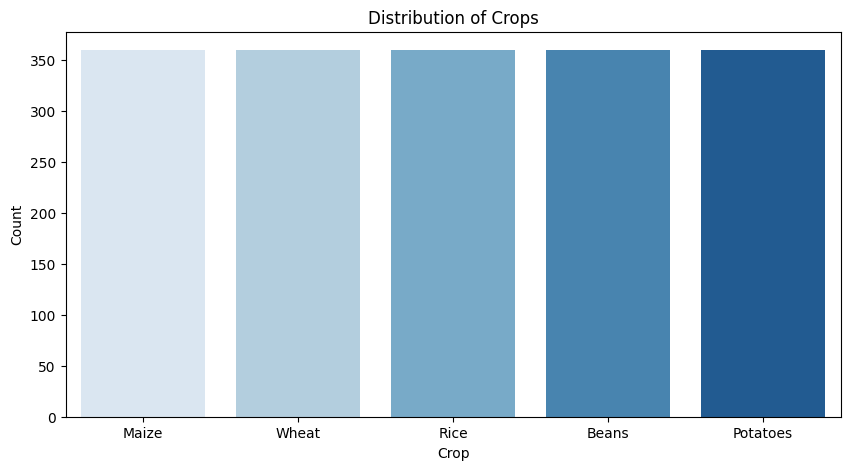

In [13]:
#CHECK DATA PROPORTION PER CROPS
plt.figure(figsize=(10,5))
sn.countplot(x="Crop", hue="Crop", data=KARI_data, palette="Blues")
plt.title("Distribution of Crops")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.show()

**Data Proportions are the same for each type of crop**

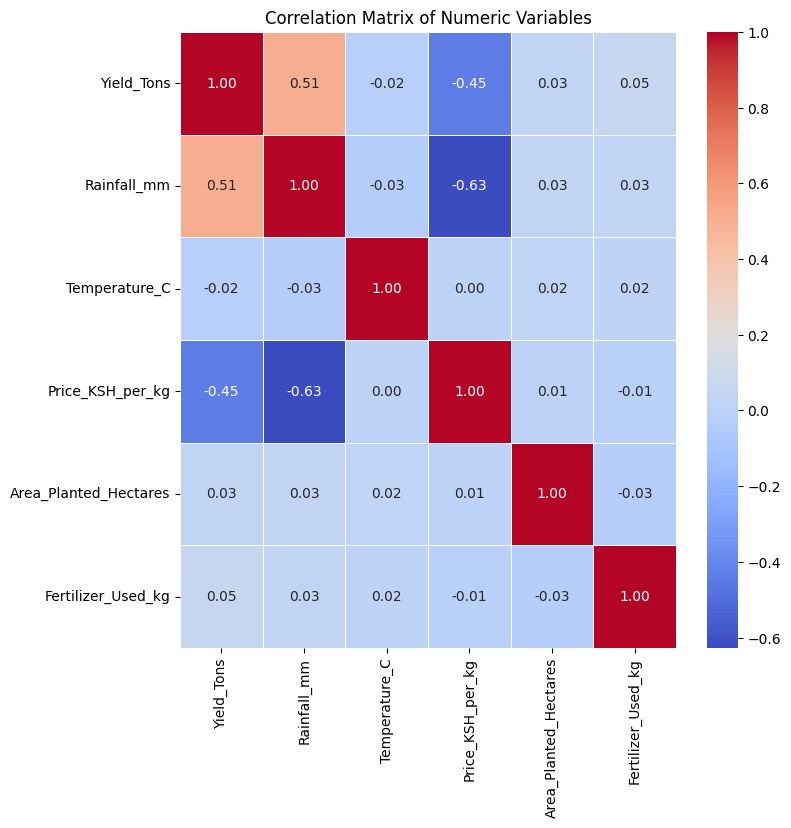

In [14]:
numeric_cols = original_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = original_data[numeric_cols].corr()

plt.figure(figsize=(8, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

1. Yield (in tons) has a moderate positive correlation with Rainfall_mm (0.51), suggesting more rain increase total yield.
2. Price (KSH per kg) is strongly negatively correlated with Rainfall_mm (-0.63), implying higher rainfall tend to lower market prices.
3. Planting area has a negligible linear correlation with yield, rainfall, temperature, or price.
4. Temperature shows almost no linear relationship with any other factor in our data.
5. The amount of fertilizer used has very weak or no correlation with the other measured variables.

# DATA FREQUENCY COLLECTION
According to our observations, the data was collected at the end of each month in different counties and for differents crop types

# **GENERAL OBSERVATION OF OUR DATASET**

In general, the agricultural data was collected end of each month from the 31st of January 2019 to the 31st of December 2023. It was collected across 6 counties in Kenya, for 5 different types of crops. The data has no missing values.

# **NEW COLUMN CREATION**

**Seasons, month and years**

Kenya’s climate is warm year-round due to its equatorial location, with regional variations from humid coasts to temperate highlands and arid northern areas. The country experiences two dry seasons (December–March and July–October) and two rainy seasons (April–June and November–mid-December). Temperatures range from 20°C to 40°C depending on region and altitude.

**Discover the best time to visit Kenya - Original Travel. (n.d.). https://www.originaltravel.co.uk/travel-guide/kenya/best-time-to-visit**

In [15]:
KARI_data["Month"] = KARI_data["Date"].dt.month
KARI_data["Year"] = KARI_data["Date"].dt.year

def get_season(month):
    if month in [12, 1, 2, 3]:
        return "Dry season"
    elif month in [4, 5, 6]:
        return "Long rains"
    elif month == [7,8,9,10]:
        return "Dry season"
    else:
        return "Short rains"

KARI_data["Season"] = KARI_data["Month"].apply(get_season)

KARI_data

,Date,County,Crop,Yield_Tons,Rainfall_mm,Temperature_C,Price_KSH_per_kg,Area_Planted_Hectares,Fertilizer_Used_kg,Month,Year,Season
0,2019-01-31,Nakuru,Maize,2650.6,65.0,21.5,37.6,3909.0,1519.1,1,2019,Dry season
1,2019-01-31,Nakuru,Wheat,1426.7,0.7,22.3,83.5,3657.5,1409.9,1,2019,Dry season
2,2019-01-31,Nakuru,Rice,4761.3,17.5,21.3,78.1,4843.6,877.7,1,2019,Dry season
3,2019-01-31,Nakuru,Beans,5276.8,54.2,17.6,61.2,2143.3,1610.4,1,2019,Dry season
4,2019-01-31,Nakuru,Potatoes,5534.0,34.5,24.3,56.8,2671.1,838.7,1,2019,Dry season
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2023-12-31,Machakos,Maize,8465.1,101.9,23.6,61.0,2651.0,1458.8,12,2023,Dry season
1796,2023-12-31,Machakos,Wheat,6100.9,107.5,26.6,50.2,2003.2,1224.7,12,2023,Dry season
1797,2023-12-31,Machakos,Rice,9206.1,78.3,15.4,52.2,4637.3,941.7,12,2023,Dry season
1798,2023-12-31,Machakos,Beans,5205.6,102.3,22.3,53.3,2343.0,1960.1,12,2023,Dry season


# **CHECKING DISTRIBUTIONS AND OUTLIERS**

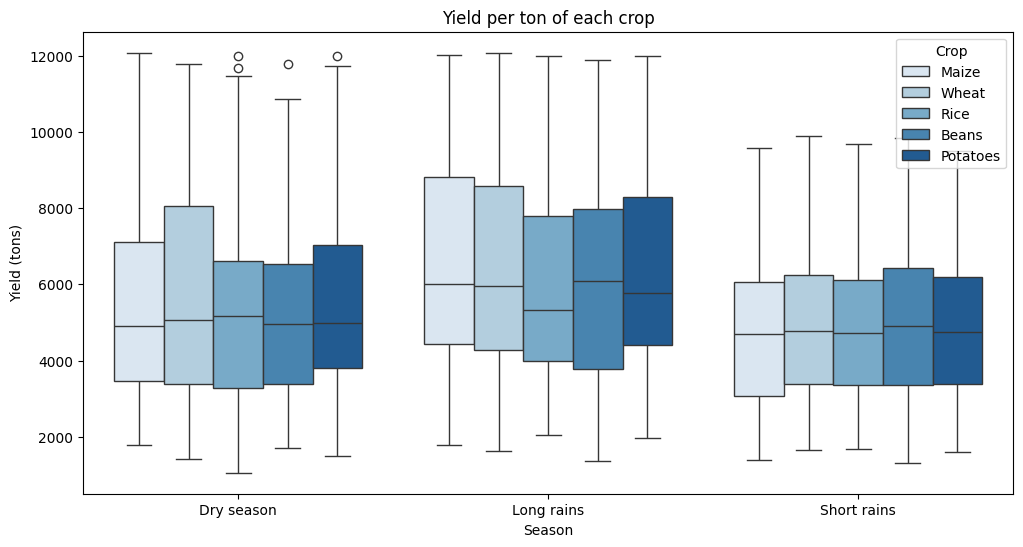

In [16]:
plt.figure(figsize=(12,6))
sn.boxplot(x="Season", y="Yield_Tons", hue="Crop", data=KARI_data, palette="Blues")
plt.title("Yield per ton of each crop")
plt.xlabel("Season")
plt.ylabel("Yield (tons)")
plt.show()

During the dry season, we observe that some wheat fields show high production levels compared to the average. The same pattern appears for maize and potatoes. We also notice a few extreme production values, which may be explained by larger cultivated areas.

The variation in production during the dry season and the long rainy season is quite large (over 2,000 tons), whereas the short rainy season shows much smaller fluctuations, around 1,000 tons.

Key questions to explore:

Are these differences driven by the size of the cultivated area?

Or are they the result of higher yields?

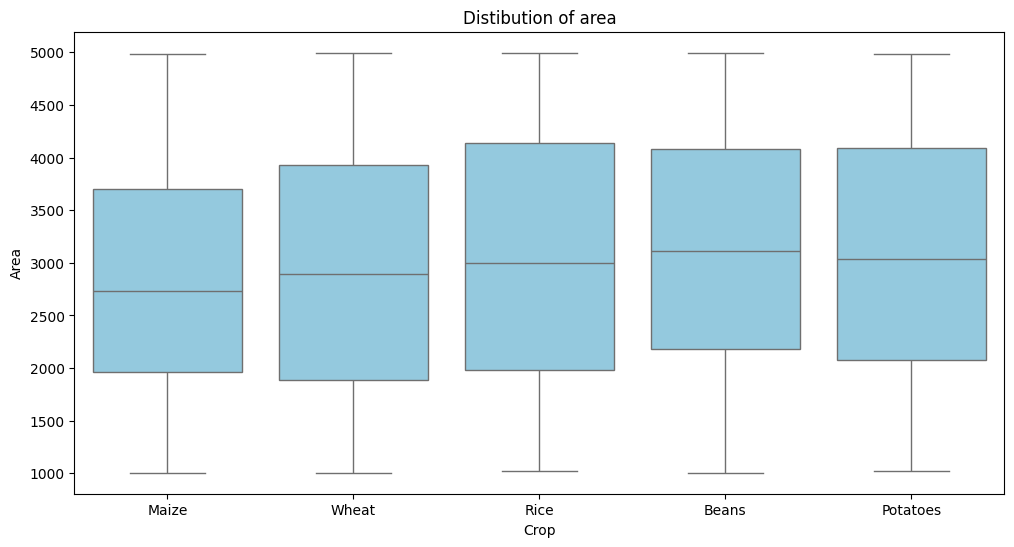

In [17]:
plt.figure(figsize=(12,6))
sn.boxplot(x="Crop", y="Area_Planted_Hectares", data=KARI_data, color="skyblue")
plt.title("Distibution of area")
plt.xlabel("Crop")
plt.ylabel("Area")
plt.show()

There is a big distribution between planted (2000 ha) based on crops.

What about crop?

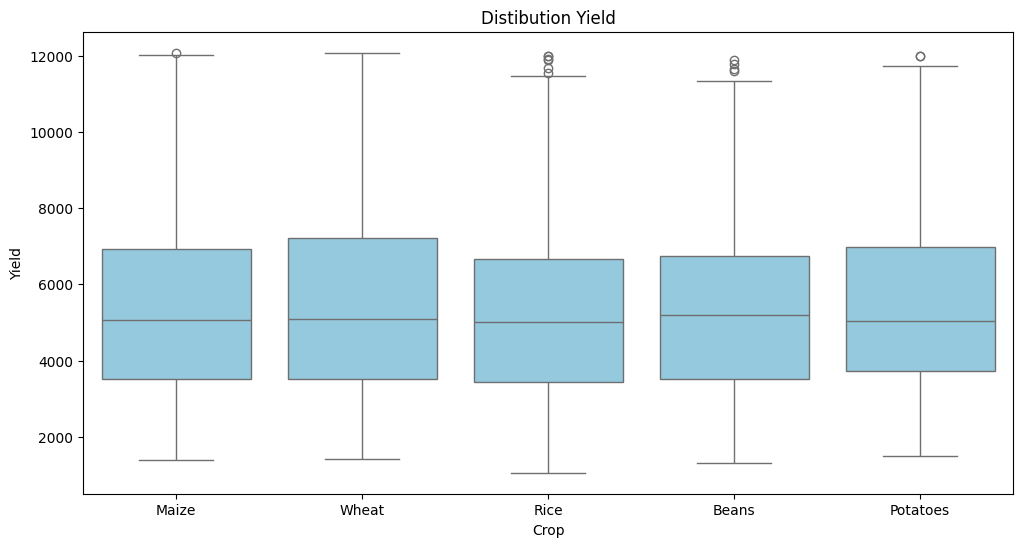

In [18]:
plt.figure(figsize=(12,6))
sn.boxplot(x="Crop", y="Yield_Tons", data=KARI_data, color="skyblue")
plt.title("Distibution Yield")
plt.xlabel("Crop")
plt.ylabel("Yield")
plt.show()

For the same, Yield varies around 2000 tons for each crops.\
Can we say the production is proportional to planted area?

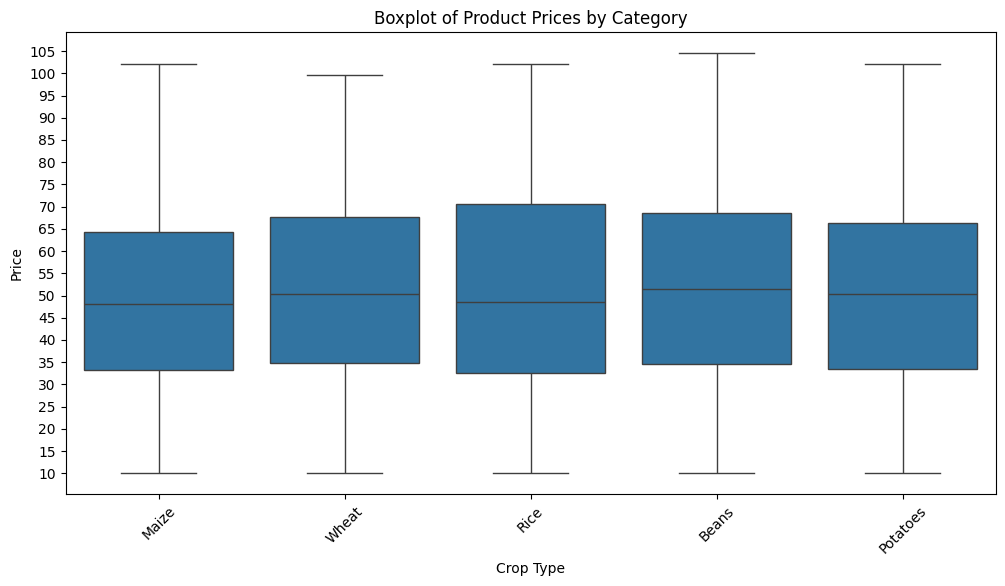

In [19]:
# Plot the boxplot for the Price column by Category
plt.figure(figsize=(12, 6))
sn.boxplot(x='Crop', y='Price_KSH_per_kg', data=df)
plt.title('Boxplot of Product Prices by Category')
plt.xlabel('Crop Type')
plt.ylabel('Price')
plt.xticks(rotation=45)

# --- Graduations de 10 en 10 sur l'axe Y ---
min_y = int(df['Price_KSH_per_kg'].min())
max_y = int(df['Price_KSH_per_kg'].max())
plt.yticks(range(min_y, max_y + 5, 5))
plt.show()

   Maized and Potatoes: Prices are relatively stable, varying between approximately 33 and 64 KSH for most data points, with a very compact interquartile range.
  Wheat and beans : Shows the least variation (about 35 and 67 KSH), with prices.

   Rice: Has the highest fluctuation, with prices spreading from around 33 KSH to over 67 KSH.


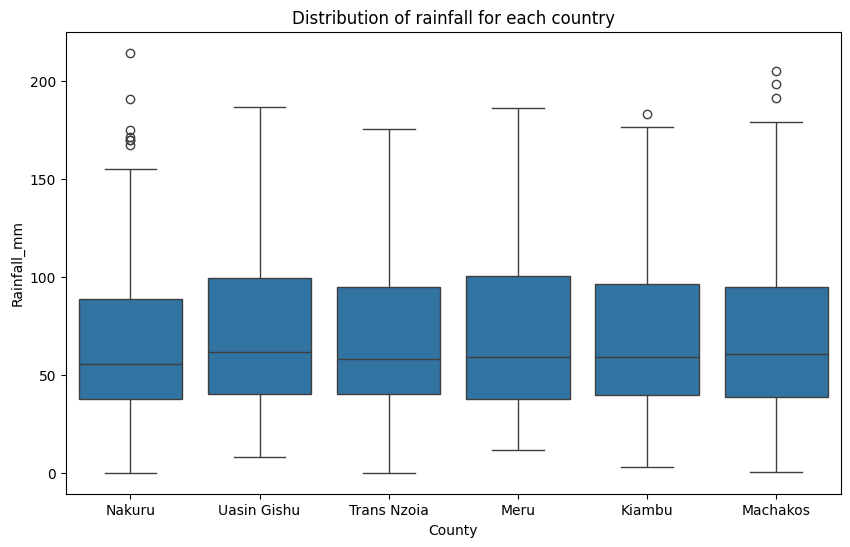

In [20]:
# Nécessite un DataFrame avec au moins les colonnes 'County' et 'Yield_Tons'
plt.figure(figsize=(10, 6))
sn.boxplot(x='County', y='Rainfall_mm', data=df)
plt.title('Distribution of rainfall for each country')
plt.show()

The rainfall quantity is almost the same in each county.

We observe a large variation in rainfall, which is expected since Kenya experiences only four months of intense rainfall.

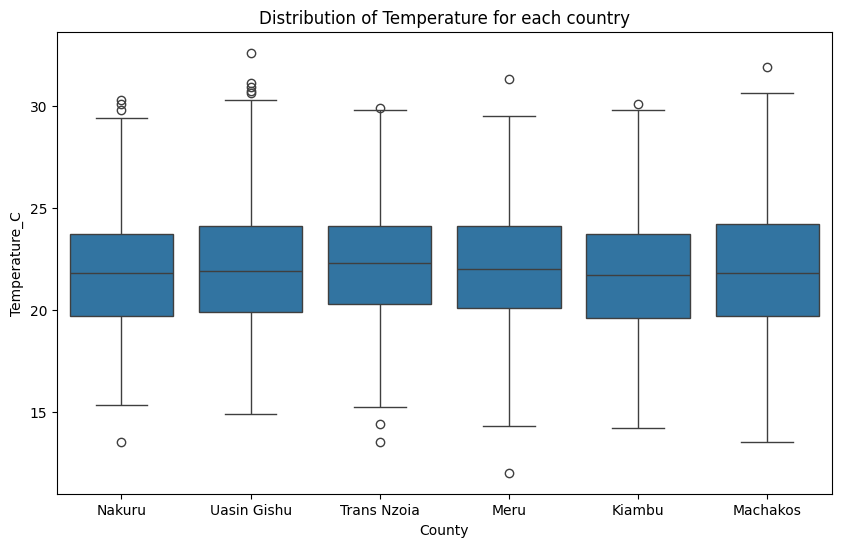

In [21]:
# Nécessite un DataFrame avec au moins les colonnes 'County' et 'Yield_Tons'
plt.figure(figsize=(10, 6))
sn.boxplot(x='County', y='Temperature_C', data=df)
plt.title('Distribution of Temperature for each country')
plt.show()

Variation of Temperatures are nearly the same across all counties and show very little variation.

## **TREND ANALYSIS**

We decided to analyze trends by **quarter** for the following reasons:

-Better visibility: The data covers 5 years, and analyzing it month by month would be too detailed and hard to interpret.

-Crop cycles: The average time of production cycle for these crops is about 3 months.

In [22]:
# new colunm for quarter
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)
df['Year'] = df['Date'].dt.year

General Yield trend for each crop

/tmp/ipykernel_183054/3885390595.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data=df, x='Quarter', y='Yield_Tons', hue='Crop',marker='o', ci=None)


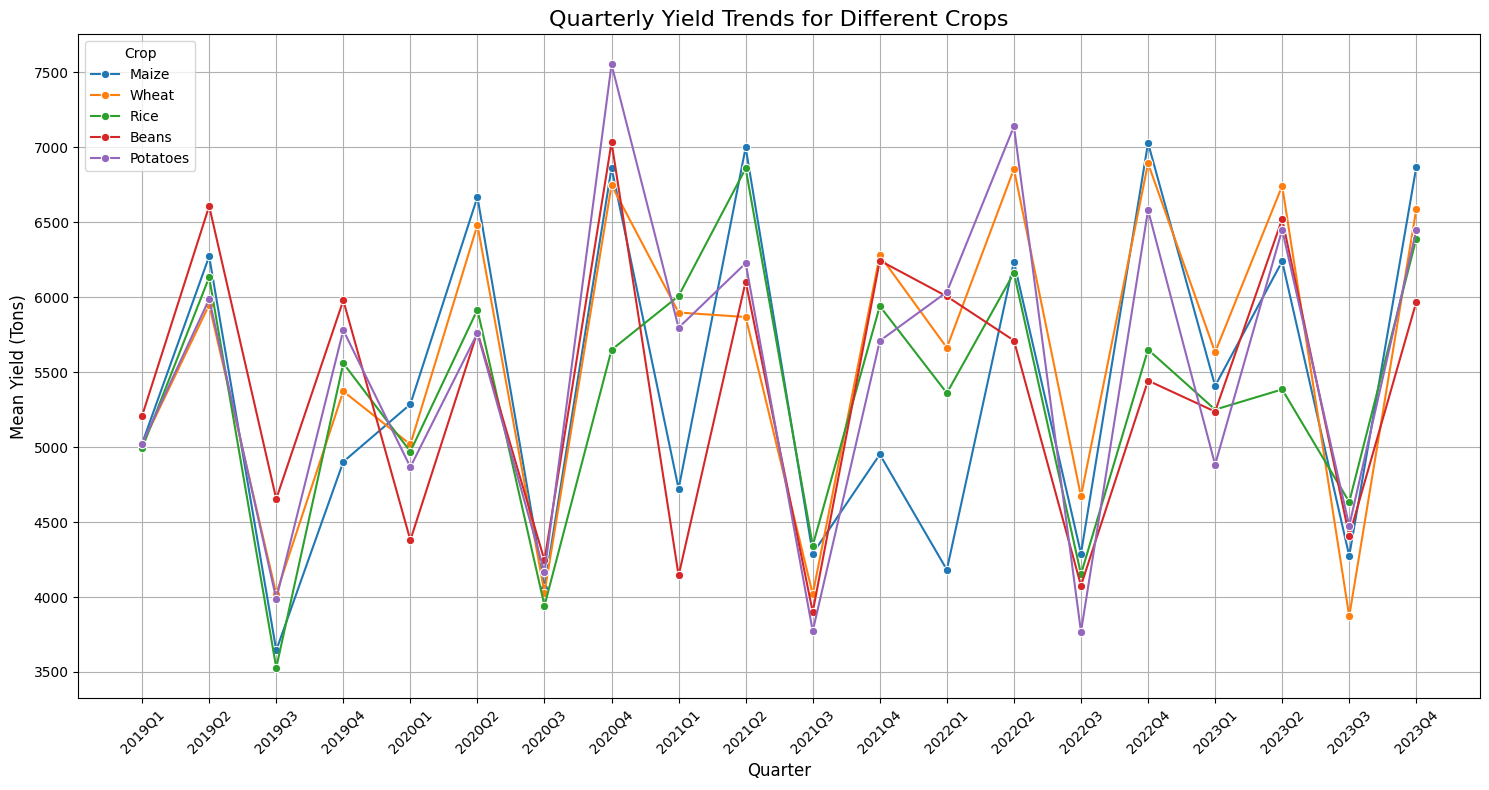

In [23]:

plt.figure(figsize=(15, 8))
sn.lineplot(data=df, x='Quarter', y='Yield_Tons', hue='Crop',marker='o', ci=None)

plt.title('Quarterly Yield Trends for Different Crops', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Mean Yield (Tons)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation of Quarterly Yield Trends

Looking at the line plot of 'Quarterly Yield Trends for Different Crops', we can draw two main conclusions:

1.  **Production Varies Over Time**: The production for all crops is not constant; it fluctuates significantly from one quarter to another. These variations can be attributed to various factors such as seasonal changes, weather conditions (rainfall, temperature), farming practices, and market dynamics. We can also notice that the lowest Yield is in the third quater.

2.  **Consistent Direction of Variation Across Crops**: A notable observation is that, for the most part, when the yield of one crop changes direction (increases or decreases), the yields of other crops tend to follow a similar pattern. This suggests that the underlying factors influencing crop production, such as weather patterns or agricultural policies, often affect multiple crops in a similar manner across the regions studied. For instance, if a quarter experiences favorable weather conditions, most crops might see an increase in yield, and conversely, adverse conditions could lead to a widespread decrease in production.


# **The fluctuation of production across counties**

---



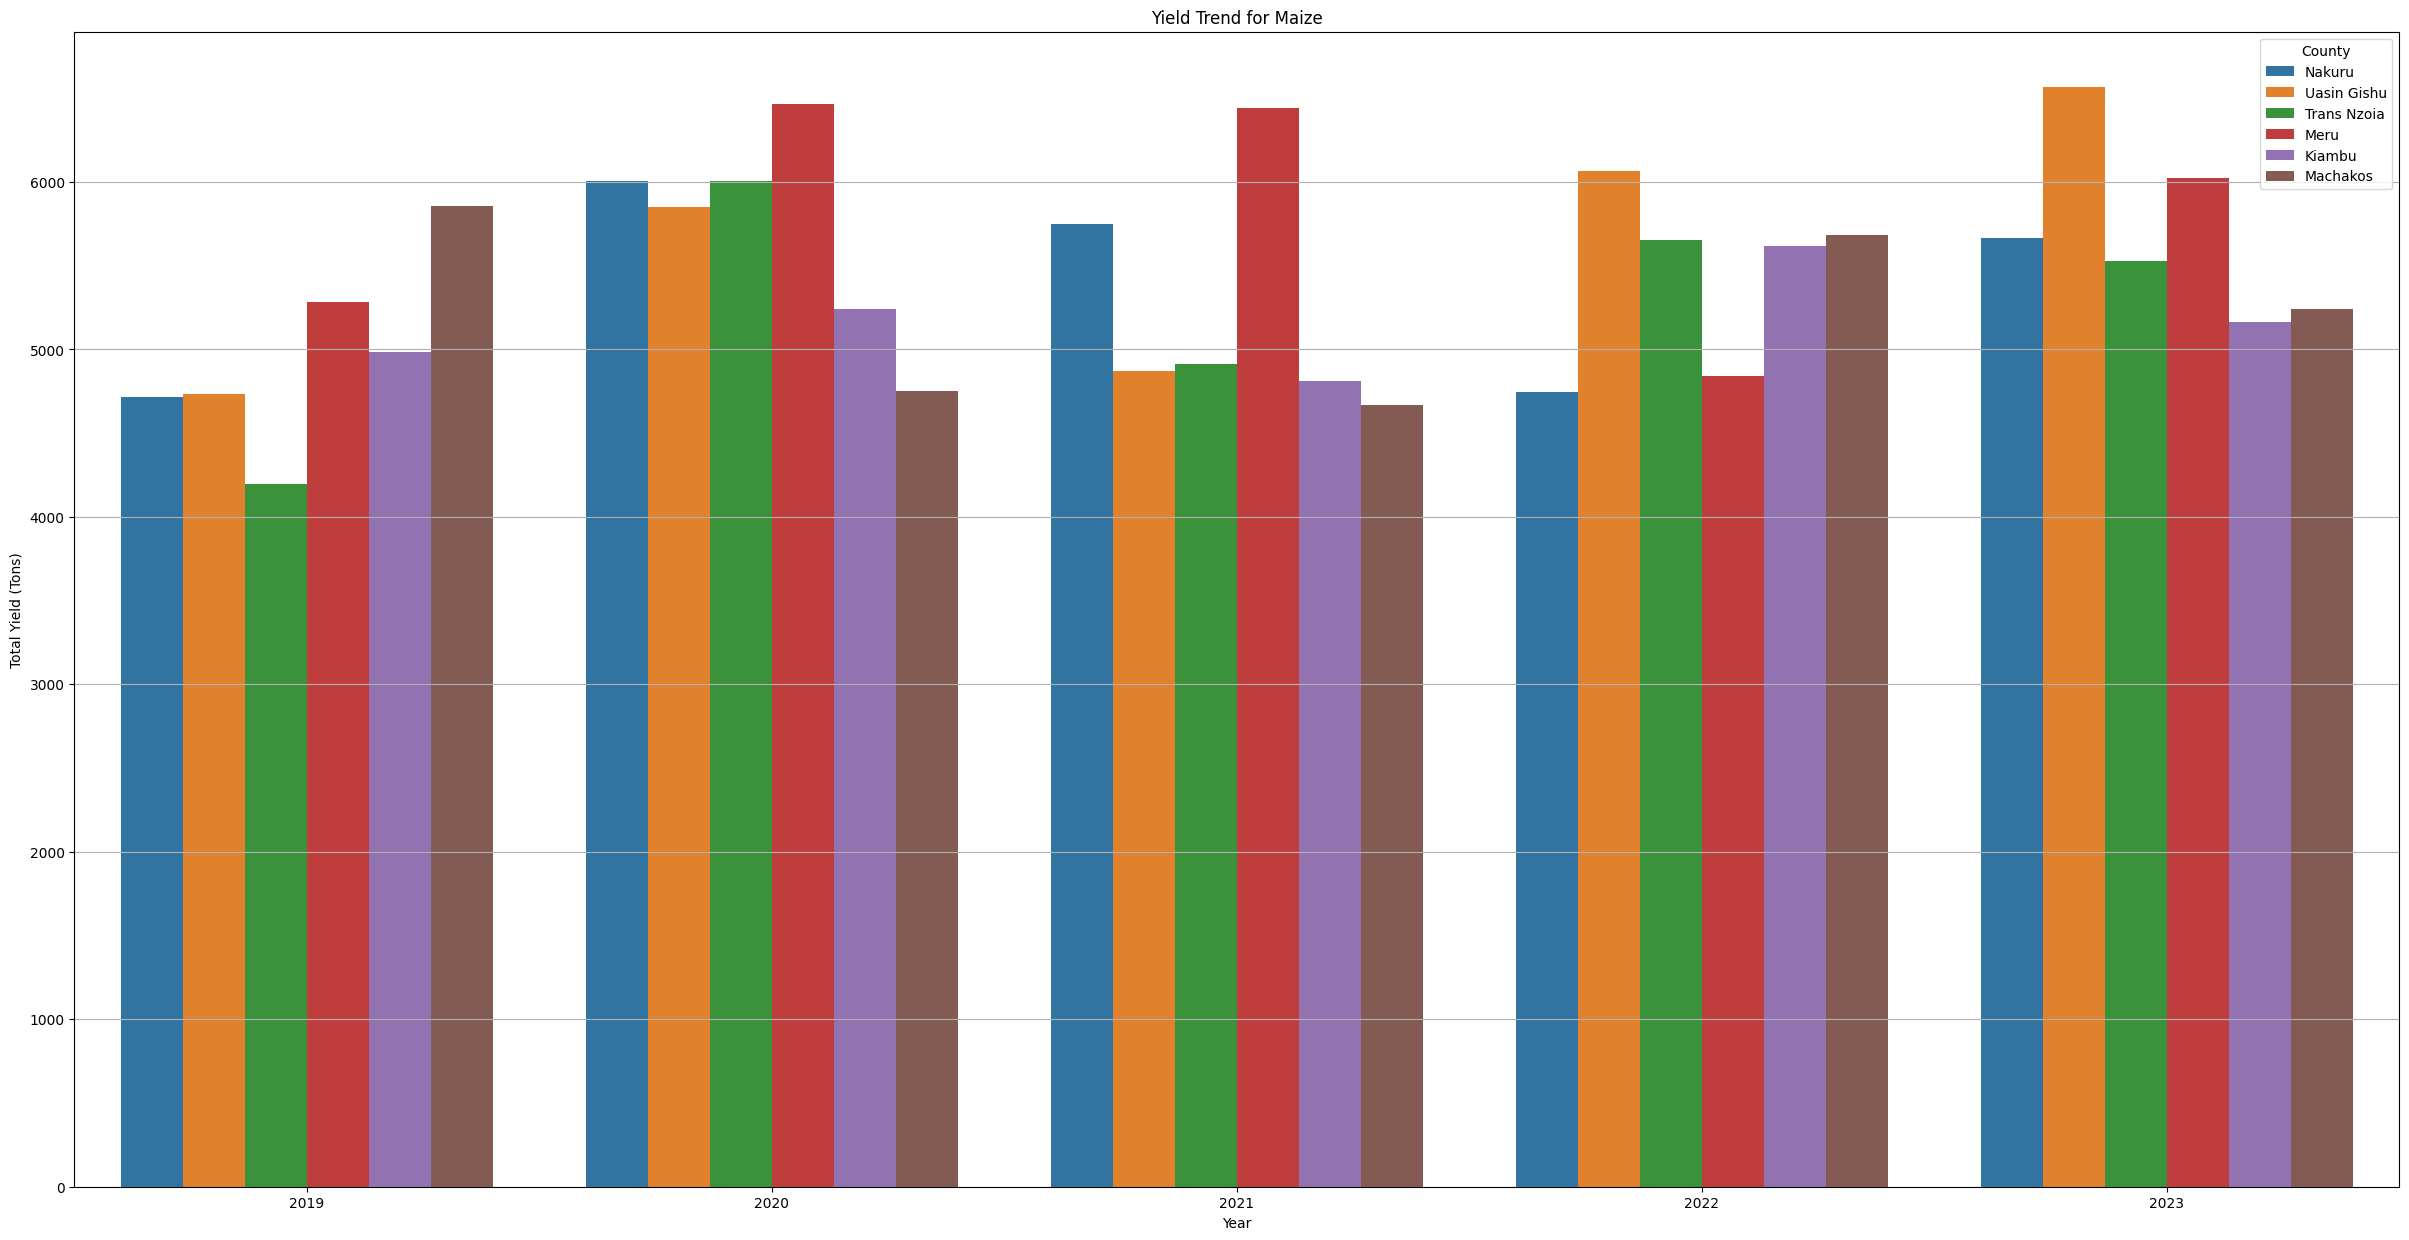

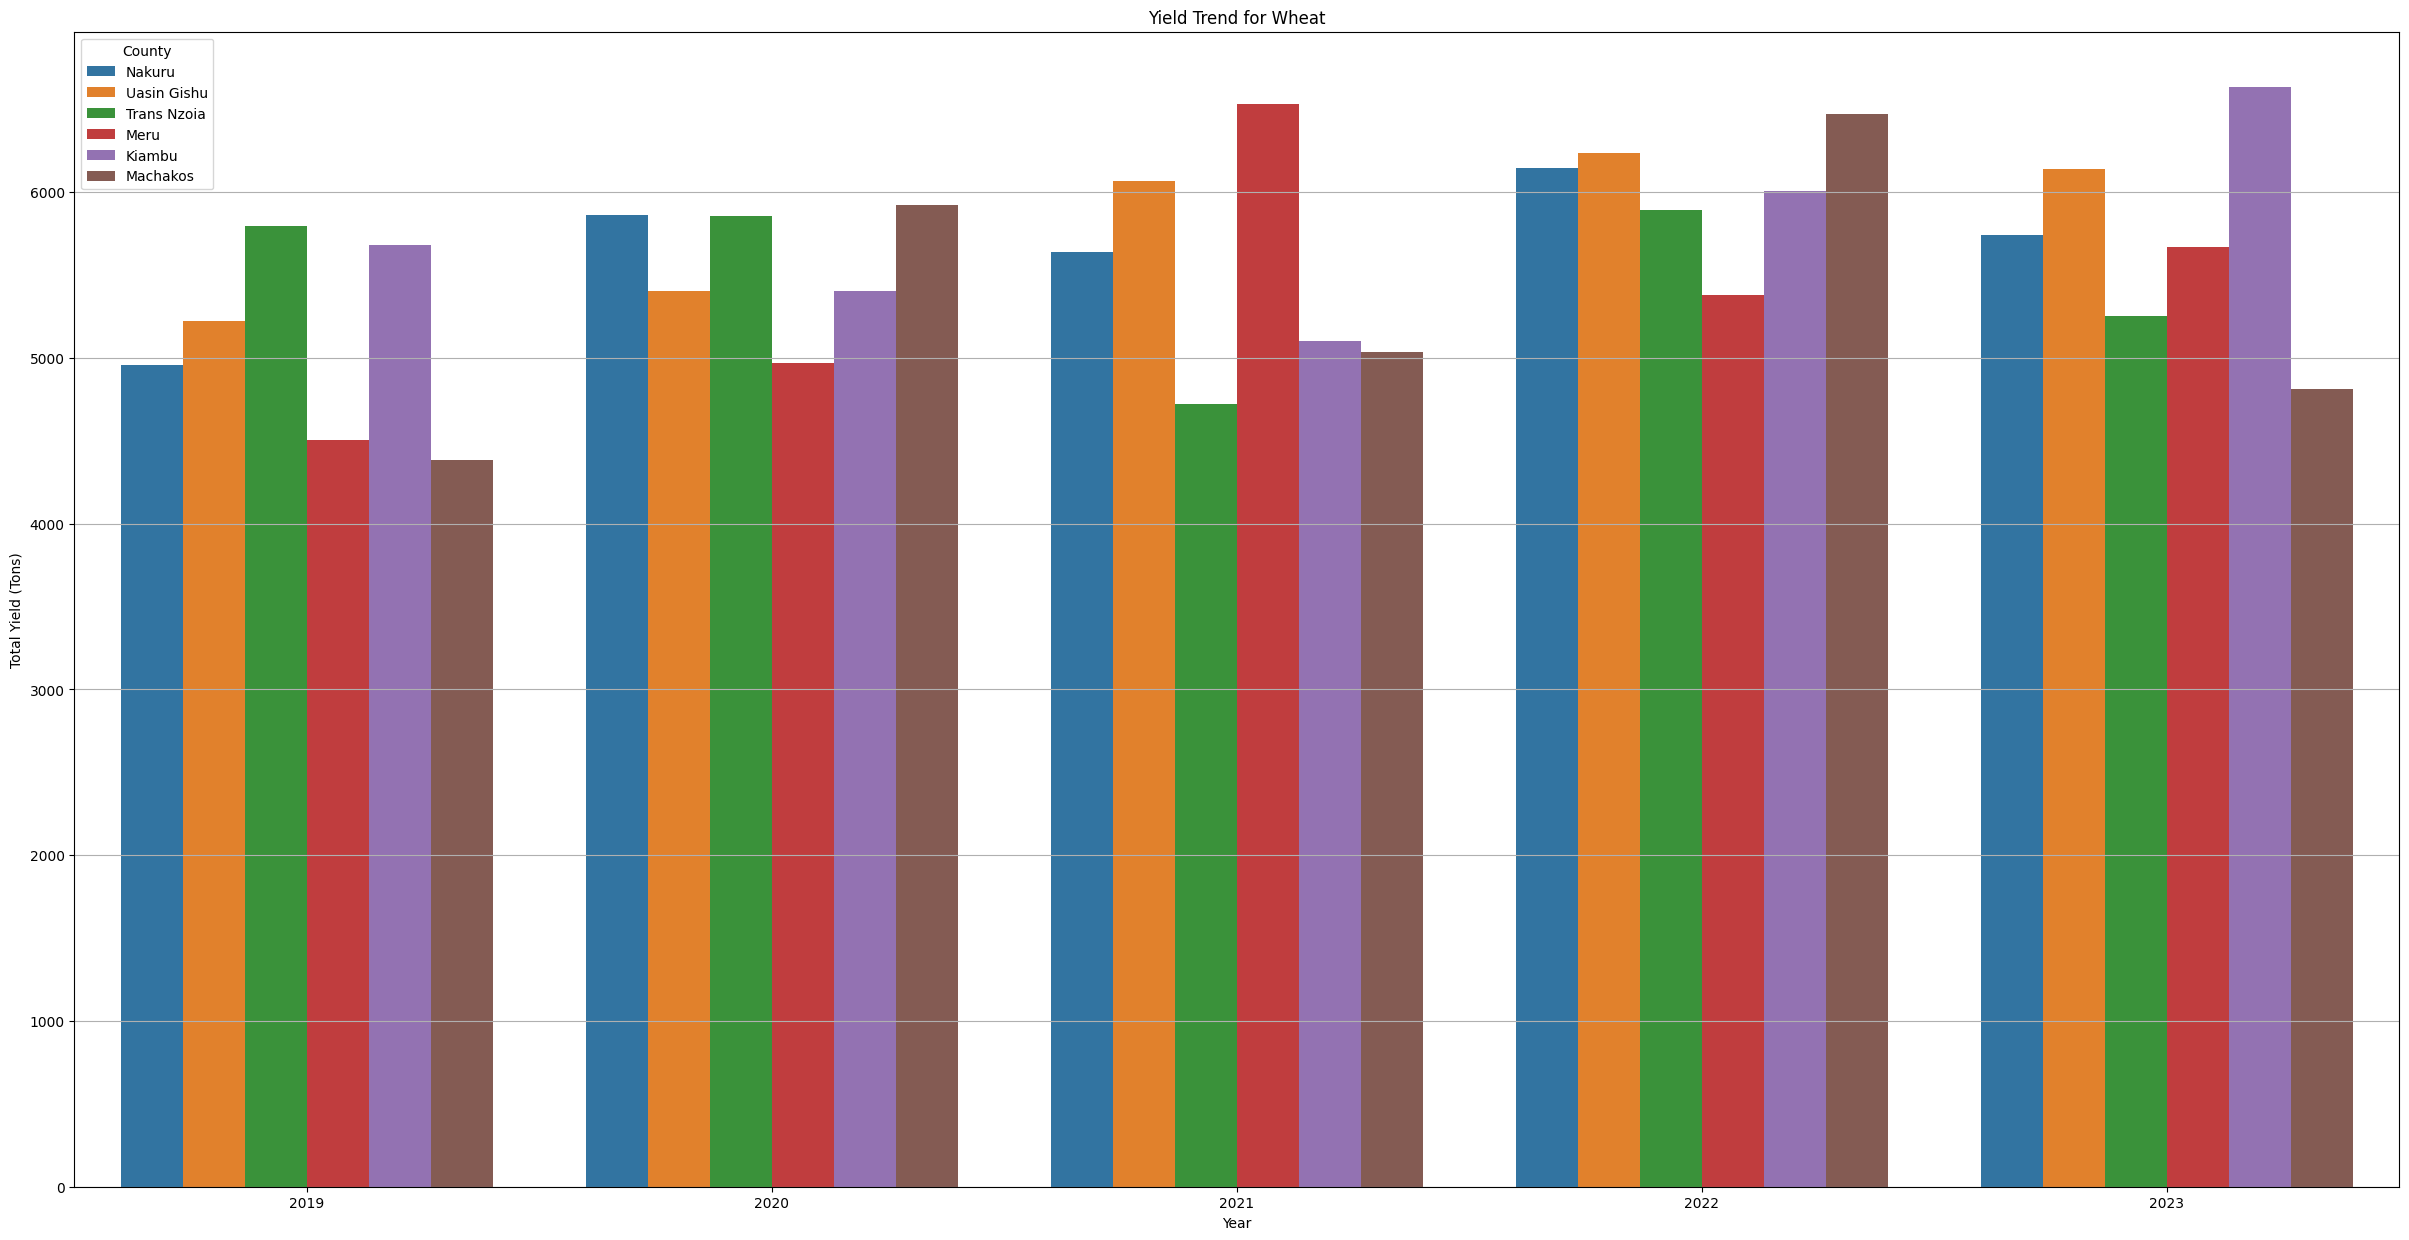

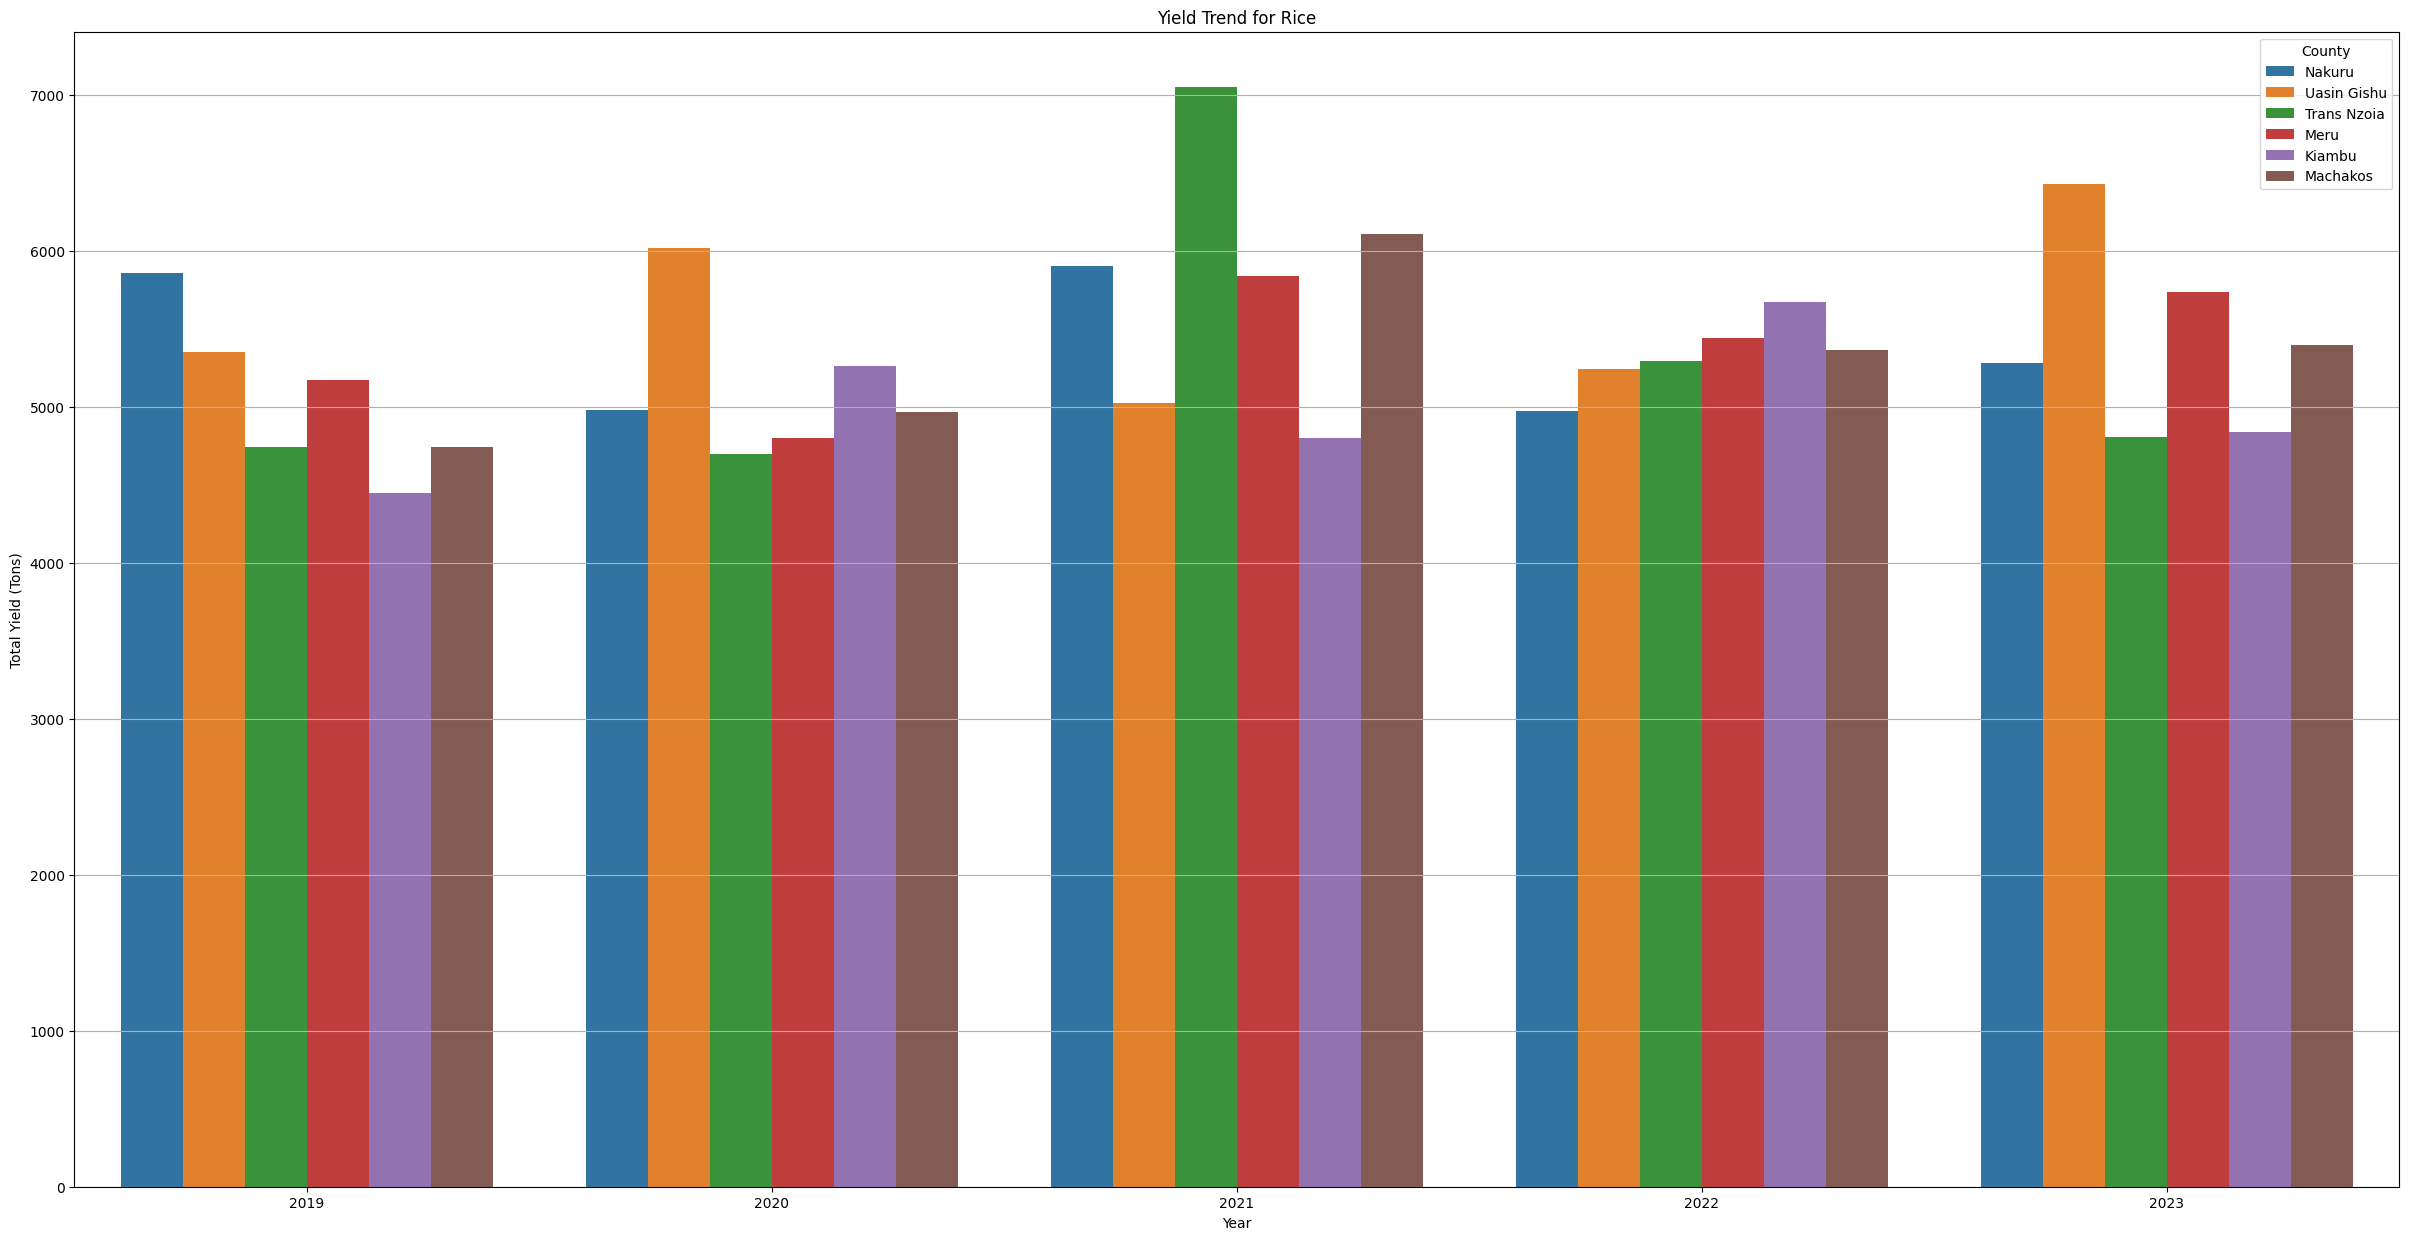

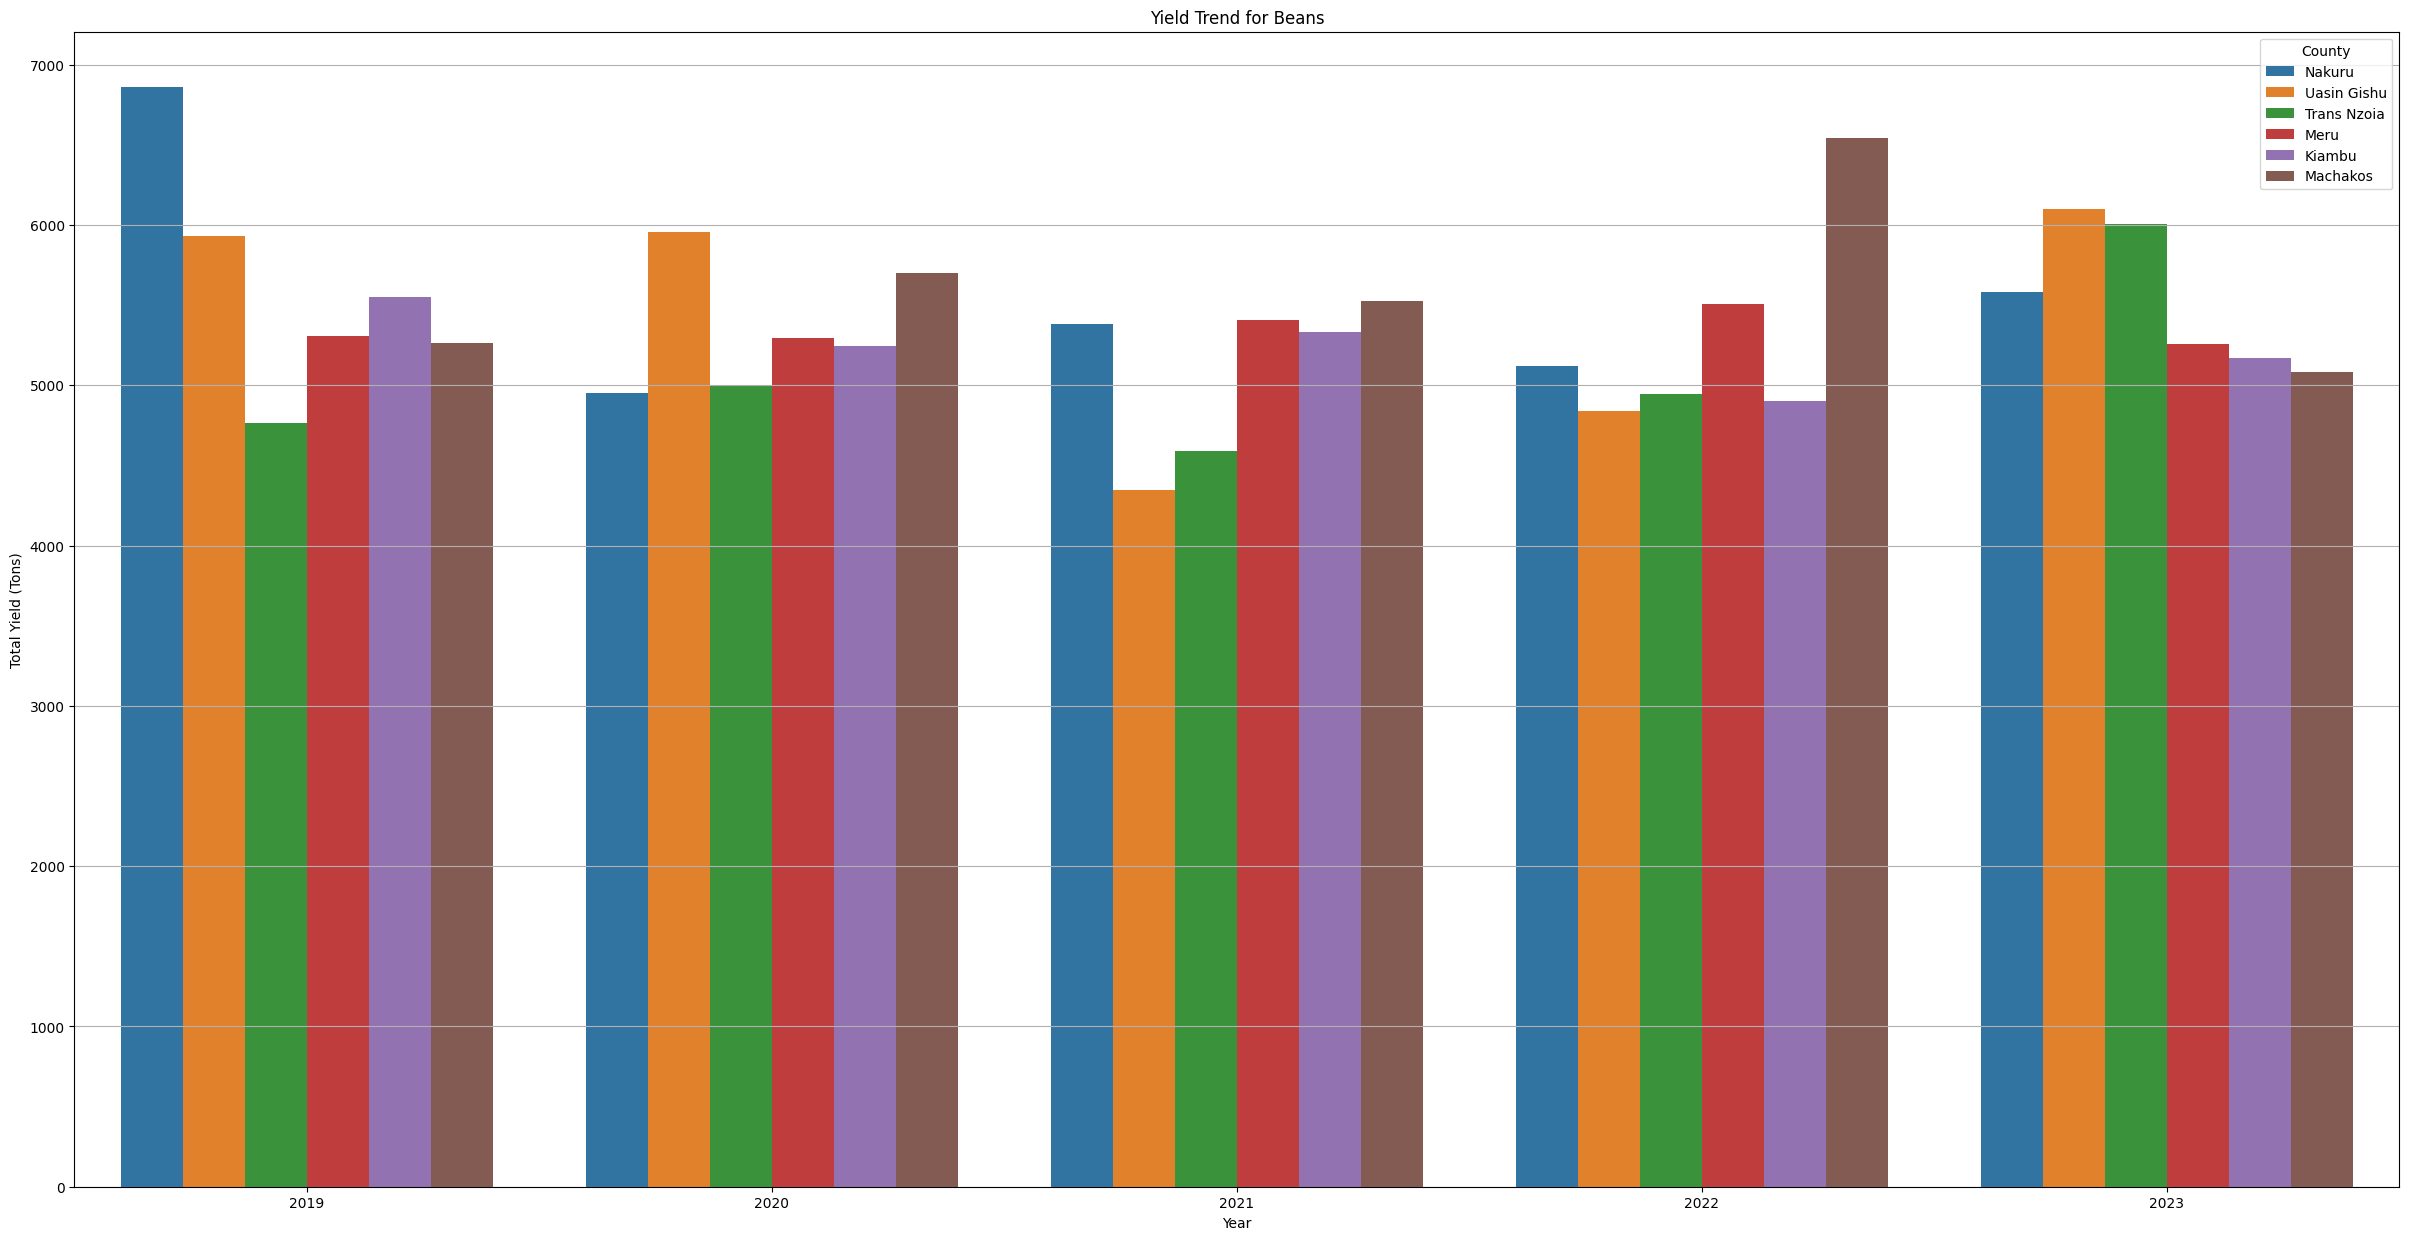

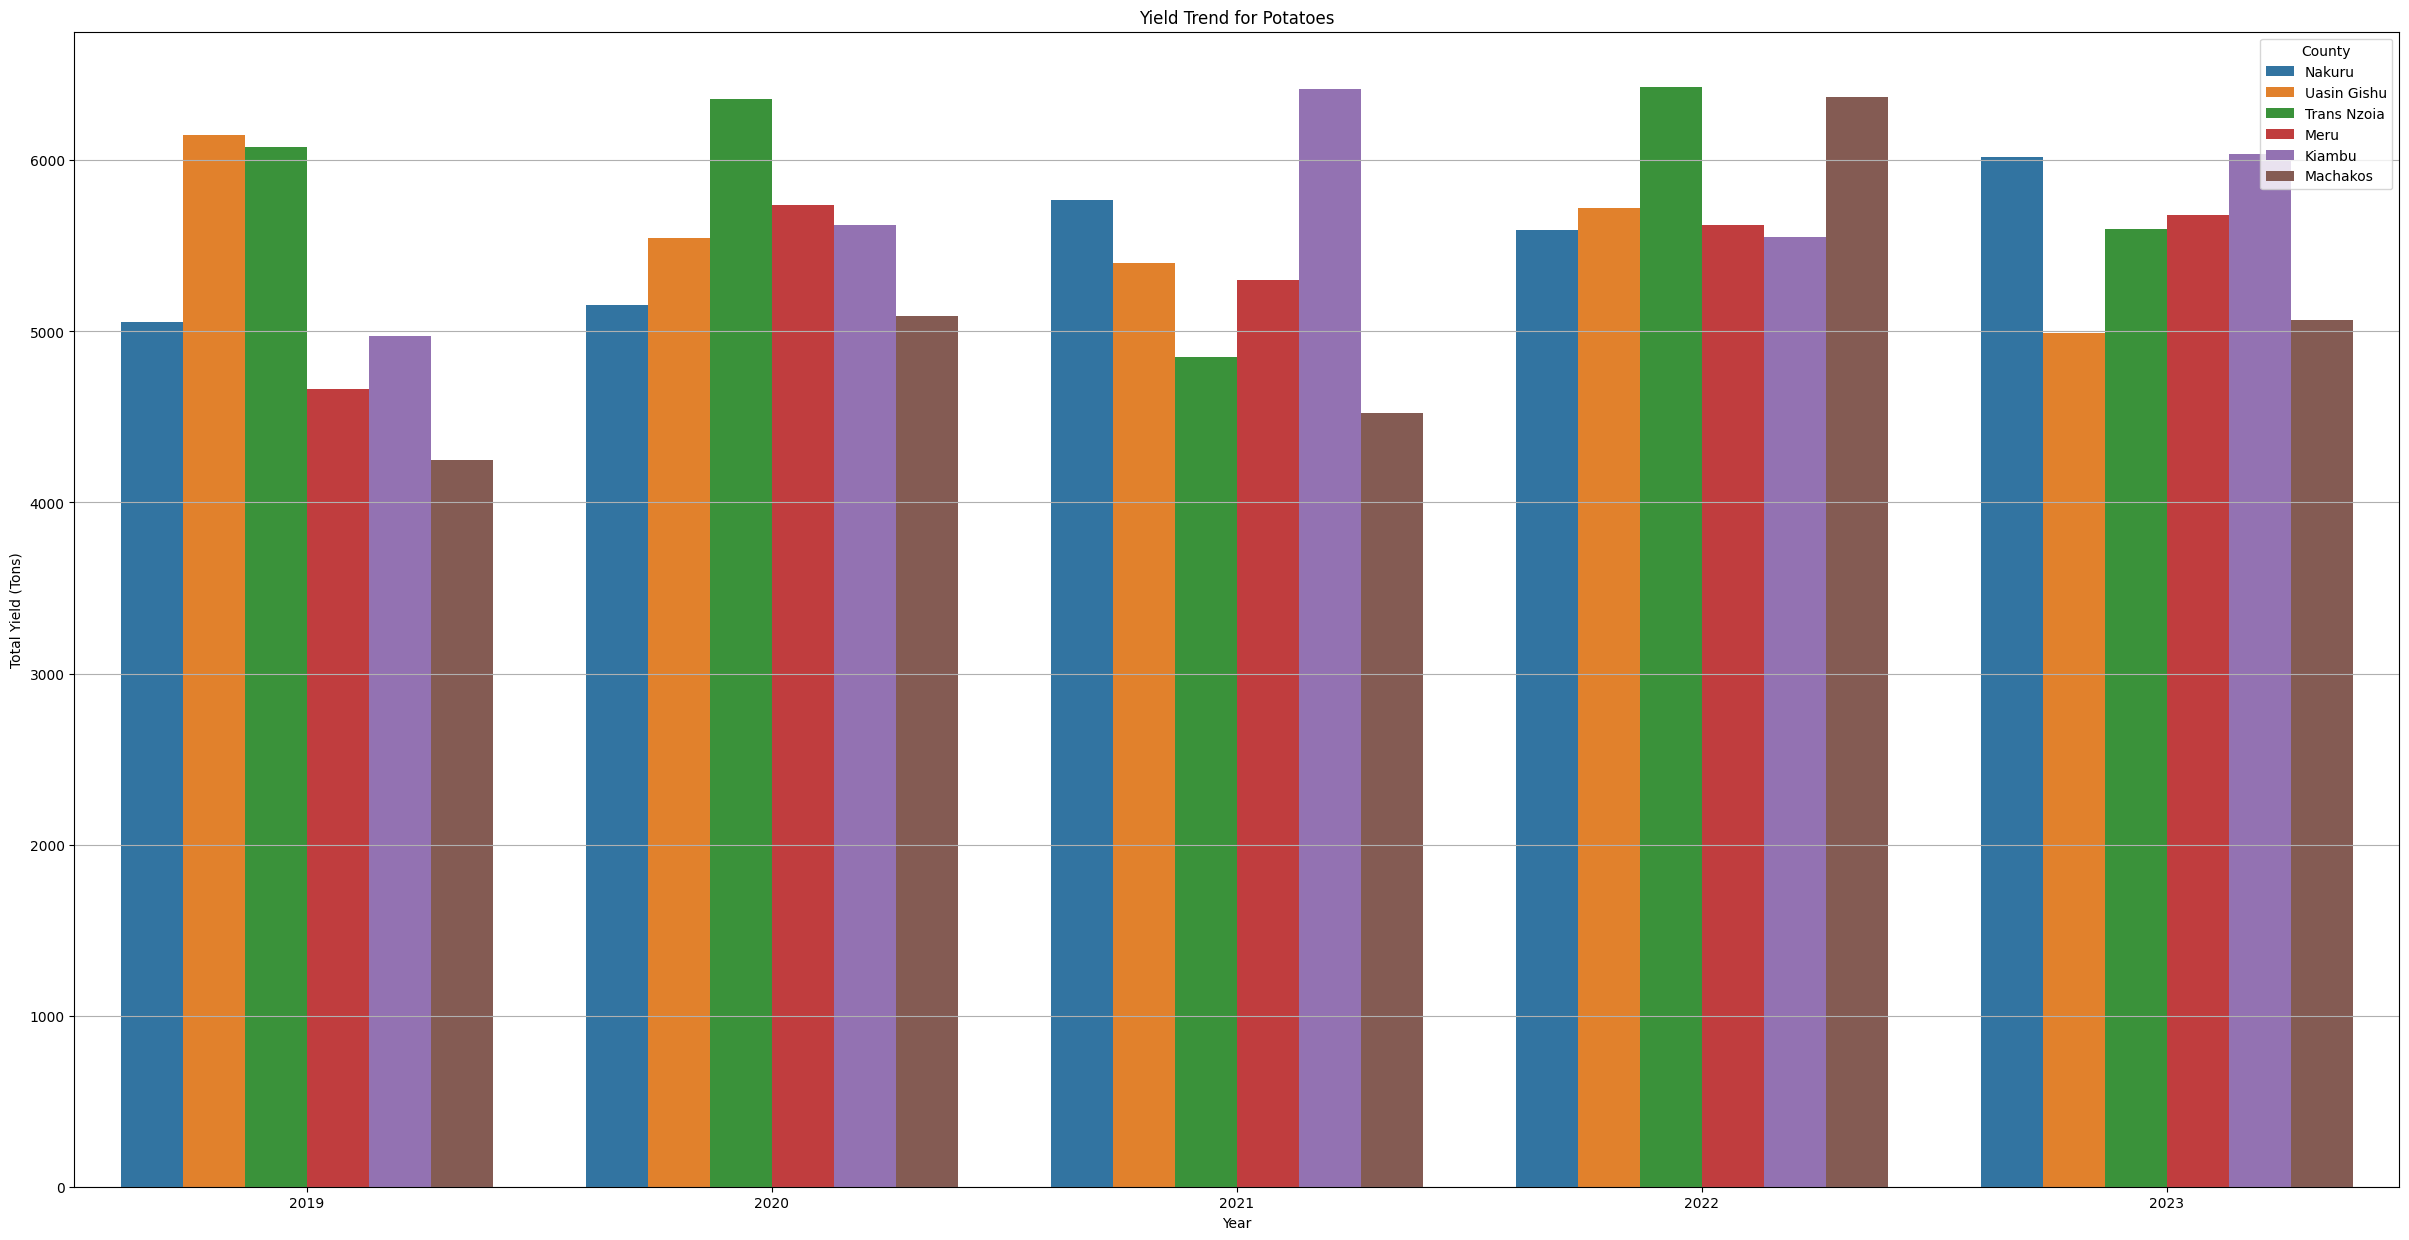

In [24]:
for crop in df['Crop'].unique():
    plt.figure(figsize=(30, 15))
    subset = df[df['Crop'] == crop]
    sn.barplot(data=subset, x='Year', y='Yield_Tons', hue='County', errorbar=None)
    plt.title(f"Yield Trend for {crop}")
    plt.xlabel("Year")
    plt.ylabel("Total Yield (Tons)")
    plt.legend(title='County')
    plt.grid(axis='y')
    plt.show()


The yield of each crop is not constant across regions.
Production levels vary from one county to another, but the fluctuations generally follow the same pattern.
When yields increase in one region, they tend to increase in others as well, and the same is true when they decline.

# **Average yield per crops and county**

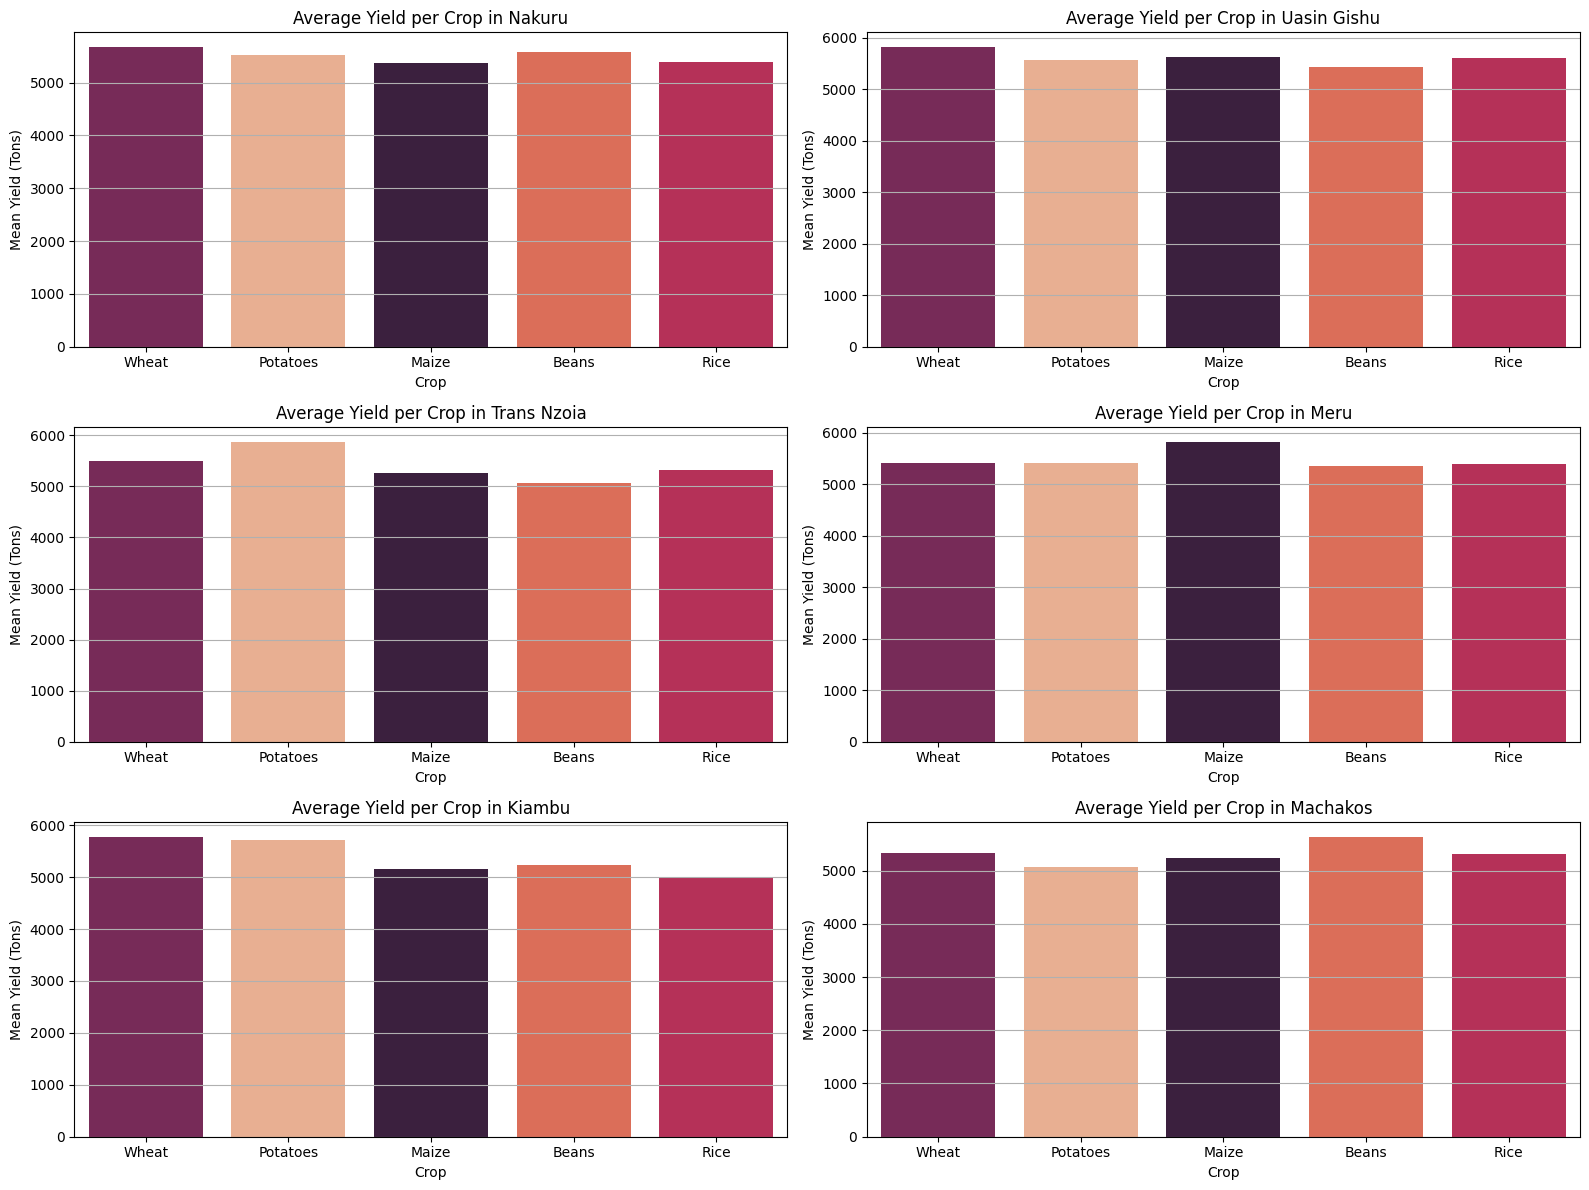

In [25]:
# Compute global crop order by average yield
crop_order = (
    df.groupby('Crop')['Yield_Tons']
    .mean()
    .sort_values(ascending=False)
    .index
)

# List of counties
counties = df['County'].unique()
n = len(counties)

# Create subplots
fig, axes = plt.subplots(nrows=(n // 2) + (n % 2), ncols=2, figsize=(16, 2 * n))
axes = axes.flatten()

for ax, county in zip(axes, counties):
    subset = df[df['County'] == county]

    sn.barplot(
        data=subset,
        x='Crop',
        y='Yield_Tons',
        hue='Crop',
        estimator='mean',
        errorbar=None,
        palette='rocket',
        order=crop_order,
        ax=ax
    )

    ax.set_title(f"Average Yield per Crop in {county}")
    ax.set_xlabel("Crop")
    ax.set_ylabel("Mean Yield (Tons)")
    ax.grid(axis='y')



plt.tight_layout()
plt.show()



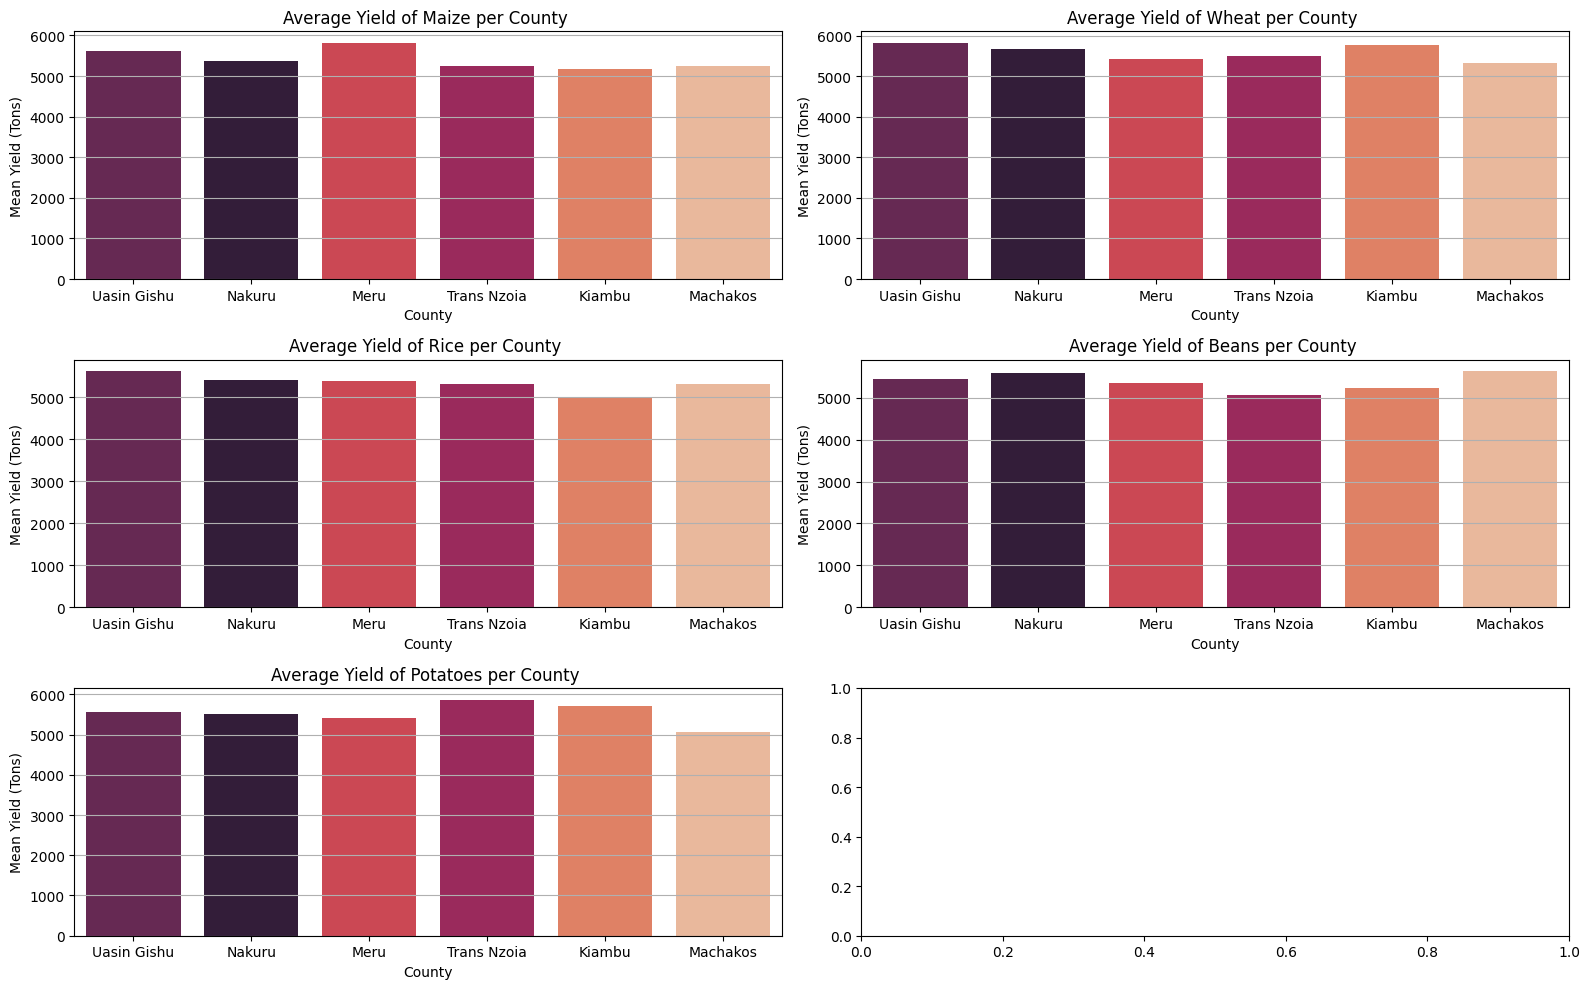

In [26]:
# Compute global crop order by average yield
crop_order = (
    df.groupby('County')['Yield_Tons']
    .mean()
    .sort_values(ascending=False)
    .index
)

# List of counties
counties = df['Crop'].unique()
n = len(counties)

# Create subplots
fig, axes = plt.subplots(nrows=(n // 2) + (n % 2), ncols=2, figsize=(16, 2 * n))
axes = axes.flatten()

for ax, county in zip(axes, counties):
    subset = df[df['Crop'] == county]

    sn.barplot(
        data=subset,
        x='County',
        y='Yield_Tons',
        hue='County',
        estimator='mean',
        errorbar=None,
        palette='rocket',
        order=crop_order,
        ax=ax
    )

    ax.set_title(f"Average Yield of {county} per County ")
    ax.set_xlabel("County")
    ax.set_ylabel("Mean Yield (Tons)")
    ax.grid(axis='y')



plt.tight_layout()
plt.show()



In [27]:
# Compute mean yield per (County, Crop)
df_mean = (
    df.groupby(['County', 'Crop'], as_index=False)['Yield_Tons']
      .mean()
)

# Select the crop with the highest mean yield for each county
best_crop_per_county = (
    df_mean.loc[df_mean.groupby('County')['Yield_Tons'].idxmax()]
             .reset_index(drop=True)
)

best_crop_per_county


,County,Crop,Yield_Tons
0,Kiambu,Wheat,5766.181667
1,Machakos,Beans,5624.401667
2,Meru,Maize,5811.033333
3,Nakuru,Wheat,5670.045000
4,Trans Nzoia,Potatoes,5863.148333
5,Uasin Gishu,Wheat,5813.425000


# **Explore production evolution according Rainfull**

/tmp/ipykernel_183054/3478294477.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data=df_month, x='Month', y='Rainfall_mm', marker='o', color='tab:blue', ax=ax1, ci=None)


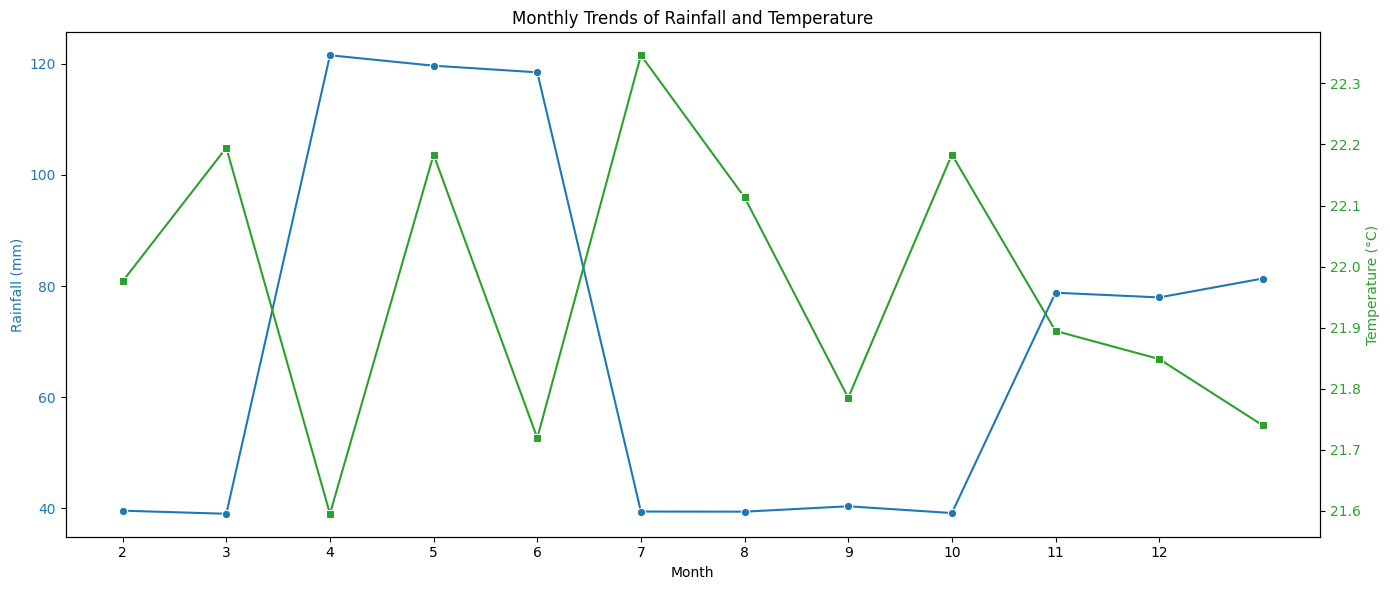

In [28]:
# Aggregate mean by month
df_month = KARI_data.groupby('Month', as_index=False)[['Rainfall_mm', 'Temperature_C']].mean()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14,6))

# Left axis: Rainfall
sn.lineplot(data=df_month, x='Month', y='Rainfall_mm', marker='o', color='tab:blue', ax=ax1, ci=None)
ax1.set_xlabel("Month")
ax1.set_ylabel("Rainfall (mm)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(0, len(df_month)))
ax1.set_xticklabels(df_month['Month'])

# Right axis: Temperature
ax2 = ax1.twinx()
sn.lineplot(data=df_month, x='Month', y='Temperature_C', marker='s', color='tab:green', ax=ax2, errorbar=None)
ax2.set_ylabel("Temperature (°C)", color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title("Monthly Trends of Rainfall and Temperature")
plt.tight_layout()
plt.show()


Temperature and rainfall generally vary in opposite directions most of the time — when rainfall increases, temperature tends to decrease, and vice versa.

/tmp/ipykernel_183054/3874235887.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month['Month'].astype(str), rotation=45)
/tmp/ipykernel_183054/3874235887.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data=month, x='Month', y='Rainfall_mm', marker='o',
/tmp/ipykernel_183054/3874235887.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month['Month'].astype(str), rotation=45)
/tmp/ipykernel_183054/3874235887.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data=month, x='Month', y='Rainfall_mm', marker='o',
/tmp/ipykernel_183054/3874235887.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

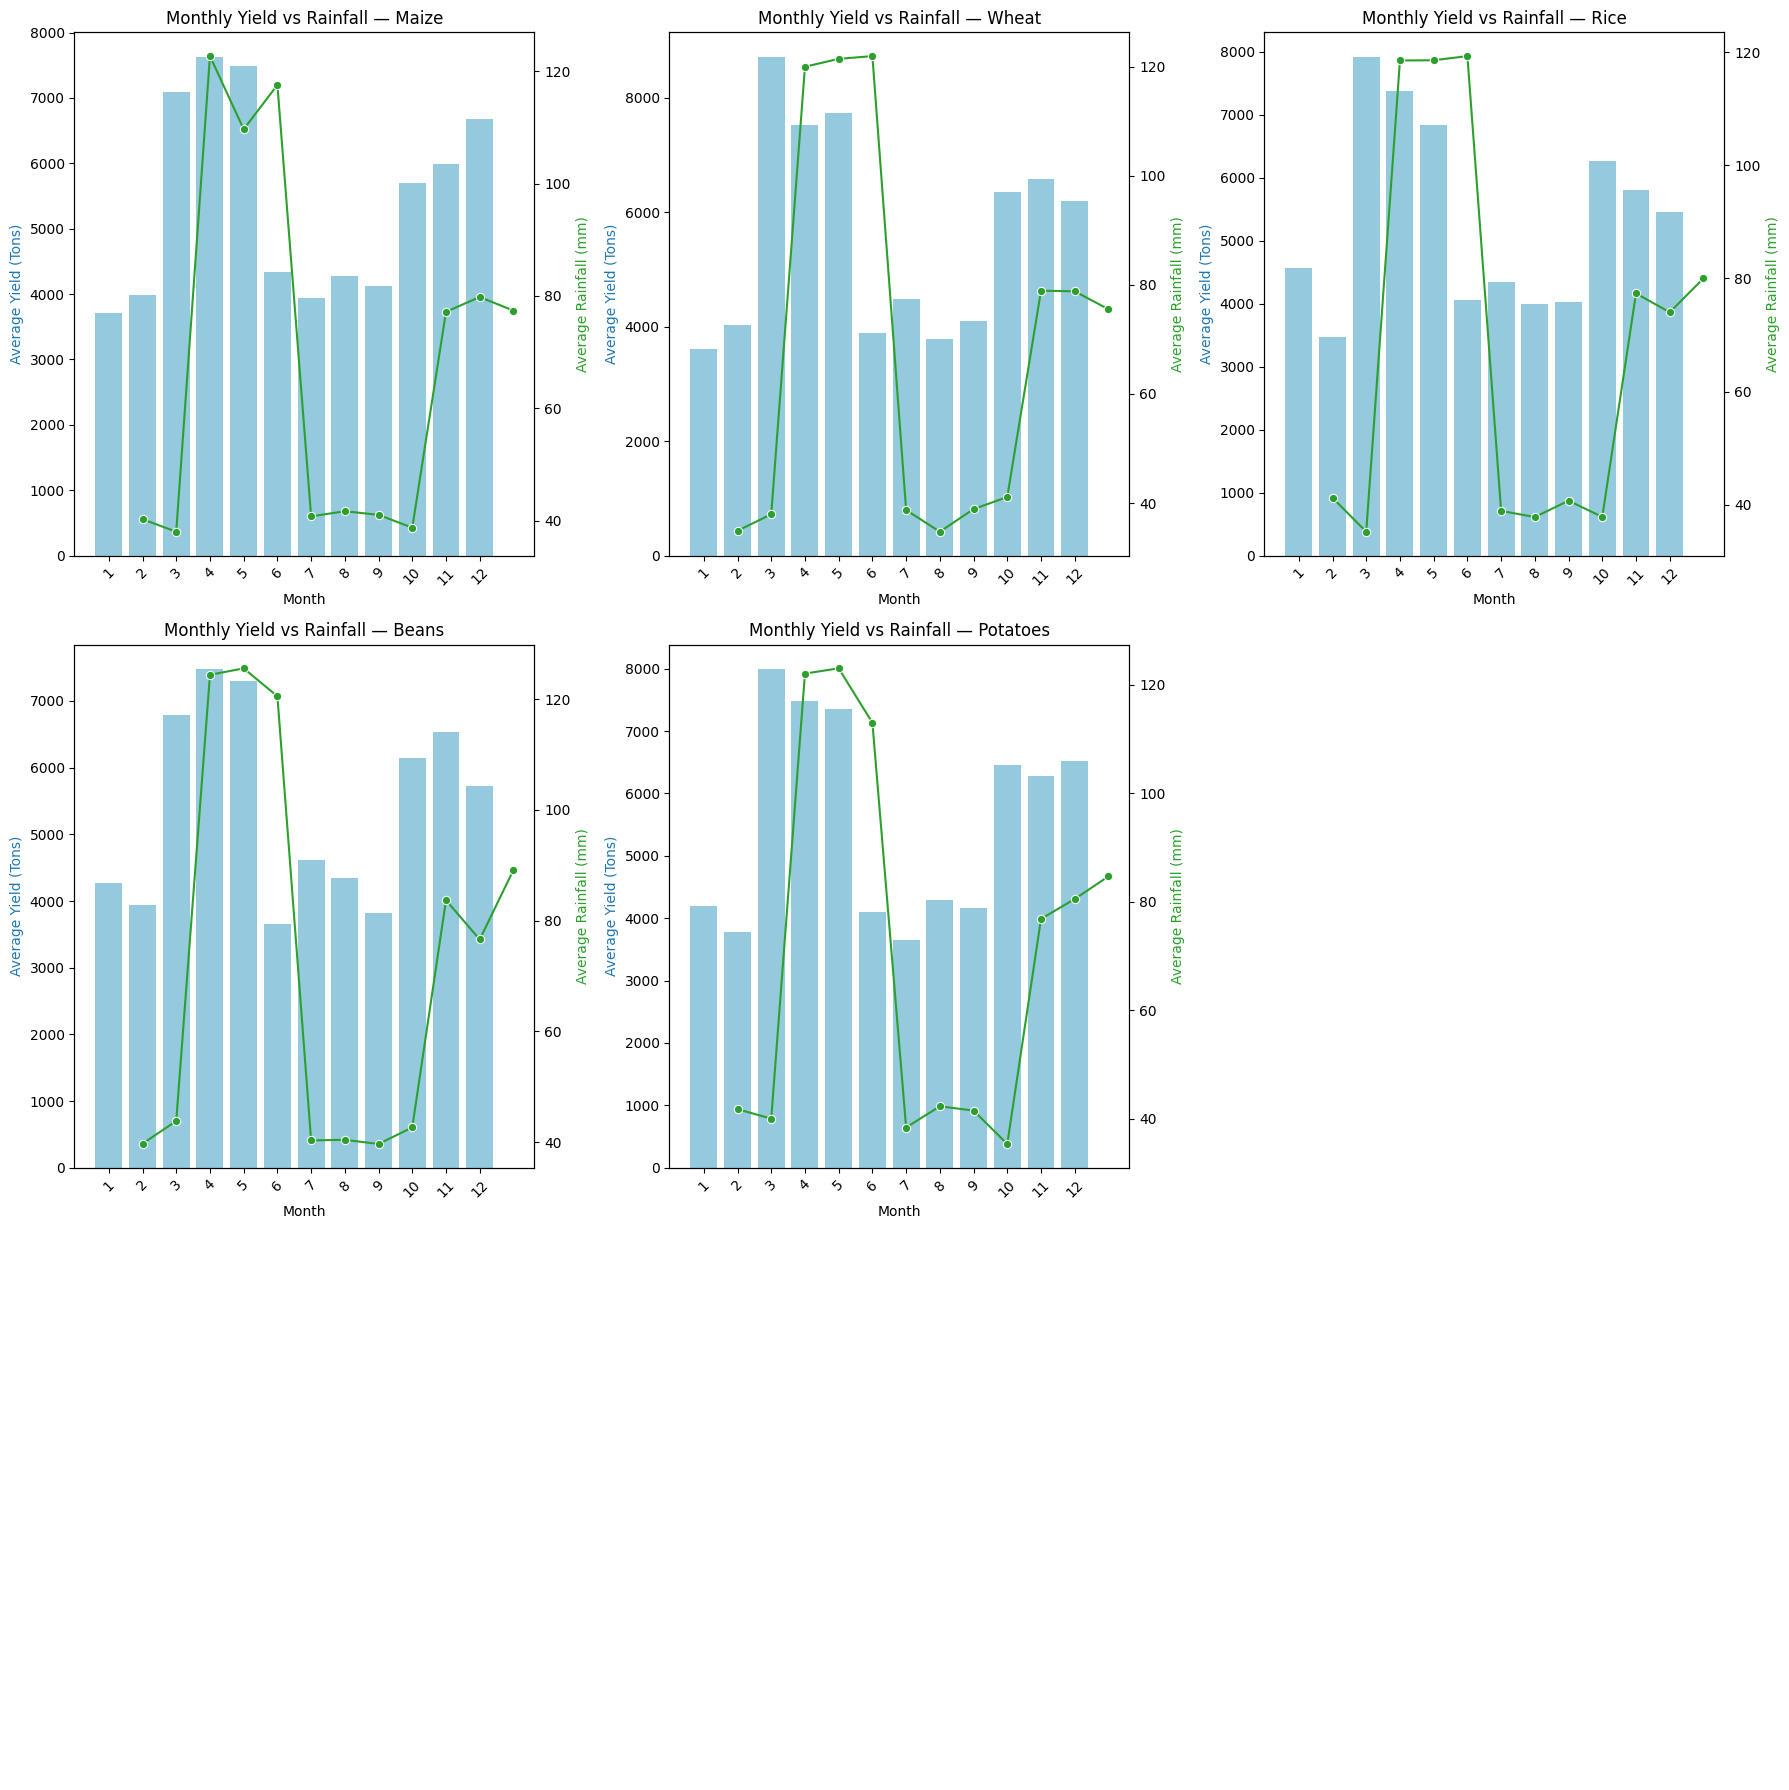

In [29]:
crops = KARI_data['Crop'].unique()
n = len(crops)

# Nombre de lignes nécessaires avec 2 colonnes
rows = 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))
axes = axes.flatten()   # Facilite l’indexation

for i, crop in enumerate(crops):

    subset = KARI_data[KARI_data['Crop'] == crop]
    month = subset.groupby('Month', as_index=False)[['Yield_Tons', 'Rainfall_mm']].mean()

    ax1 = axes[i]

    # --- Bar plot (Yield) ---
    sn.barplot(data=month, x='Month', y='Yield_Tons', color='skyblue', ax=ax1)
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Average Yield (Tons)", color='tab:blue')
    ax1.set_xticklabels(month['Month'].astype(str), rotation=45)

    # --- Line plot (Rainfall) ---
    ax2 = ax1.twinx()
    sn.lineplot(data=month, x='Month', y='Rainfall_mm', marker='o',
                color='tab:green', ax=ax2, ci=None)
    ax2.set_ylabel("Average Rainfall (mm)", color='tab:green')

    ax1.set_title(f"Monthly Yield vs Rainfall — {crop}")

# Masquer les cases vides si le nombre de cultures est impair
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

We can observe that the highest production occurs during months with the highest rainfall, and the lowest production occurs during months with the lowest rainfall.
The months with the highest production are March, April, and May.

In [30]:
#for county in df['County'].unique():
  # Price trend
  #plt.figure(figsize=(15,8))
  #subset = df[df['County'] == county]
  #plt.figure(figsize=(15,8))
  #sn.lineplot(data=subset, x='Quater', y='Price_KSH_per_kg', marker='o', hue='Crop', errorbar=None)
  #plt.title("Quater prices Trend by product{county}")
  #plt.xlabel("Quater")
  #plt.xticks(rotation=45)

  #plt.ylabel("Prices")
  #plt.grid(True)
  #plt.legend(title='County')
  #plt.show()


<Figure size 1500x800 with 0 Axes>

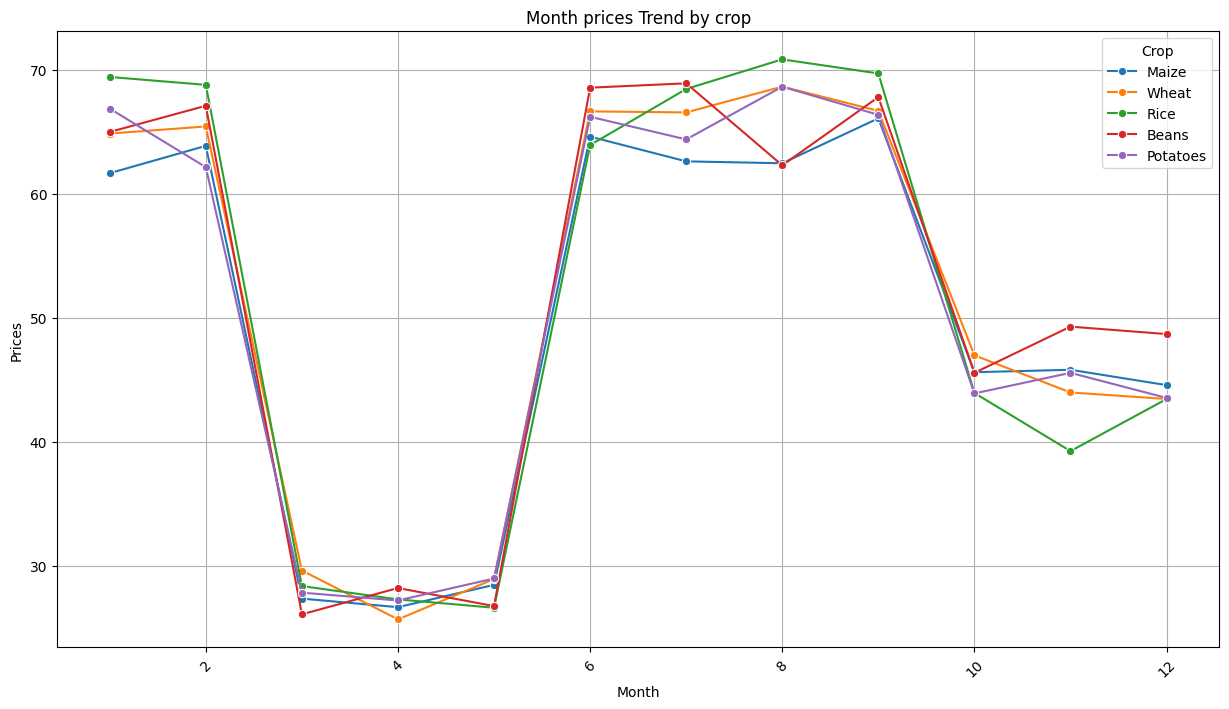

In [31]:
plt.figure(figsize=(15,8))
plt.figure(figsize=(15,8))
sn.lineplot(data=KARI_data, x='Month', y='Price_KSH_per_kg', marker='o', hue='Crop', errorbar=None)
plt.title("Month prices Trend by crop")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Prices")
plt.grid(True)
plt.legend(title='Crop')
plt.show()

Prices fluctuate in a similar way for all crops, except for beans, which show their own pattern.
The highest prices each year occur between June and September, while the lowest prices are between March and May.
The months with the lowest prices coincide with the months of highest production.

# **Let's verify if it is true for each county**

/tmp/ipykernel_183054/4131597645.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data=KARI_data, x='Month', y='Price_KSH_per_kg', marker='o', hue='County', ci=None)


<Figure size 1500x800 with 0 Axes>

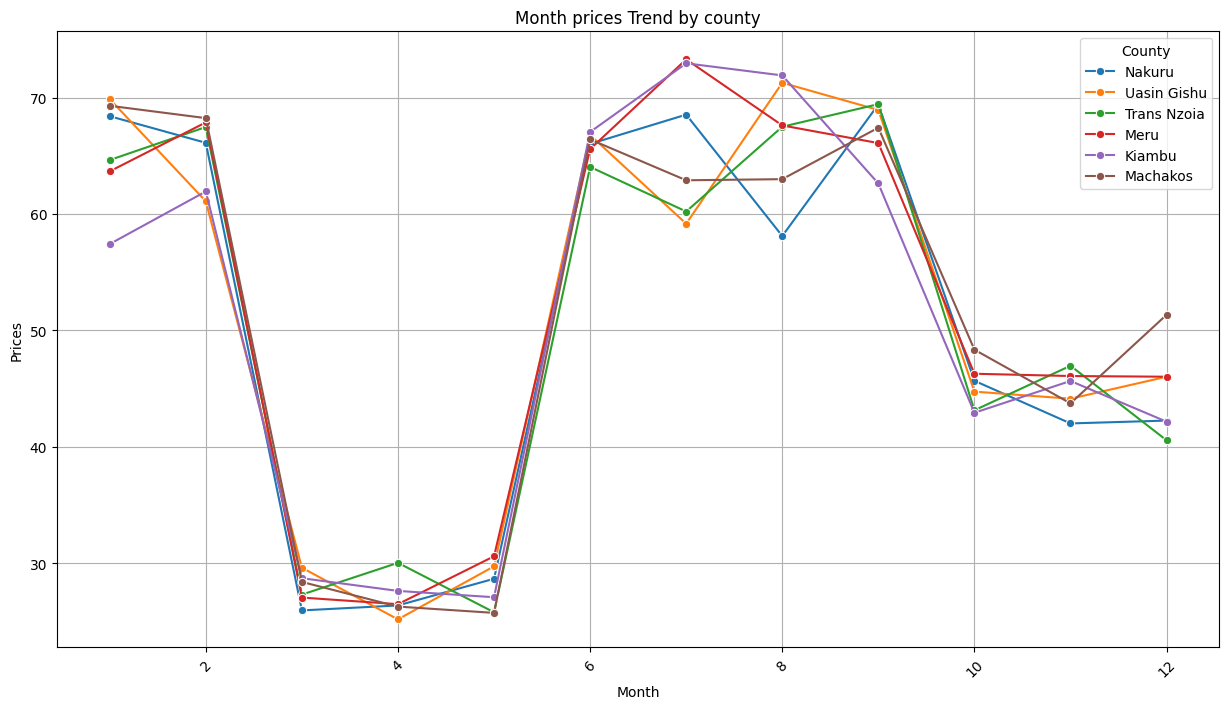

In [32]:
plt.figure(figsize=(15,8))
plt.figure(figsize=(15,8))
sn.lineplot(data=KARI_data, x='Month', y='Price_KSH_per_kg', marker='o', hue='County', ci=None)
plt.title("Month prices Trend by county")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Prices")
plt.grid(True)
plt.legend(title='County')
plt.show()

In each counties, prices fluctuate in a similar way for all crops, except for beans, which show their own pattern.
The highest prices each year occur between June and September, while the lowest prices are between March and May.
The months with the lowest prices coincide with the months of highest production.

# **Agricultural Productivity**


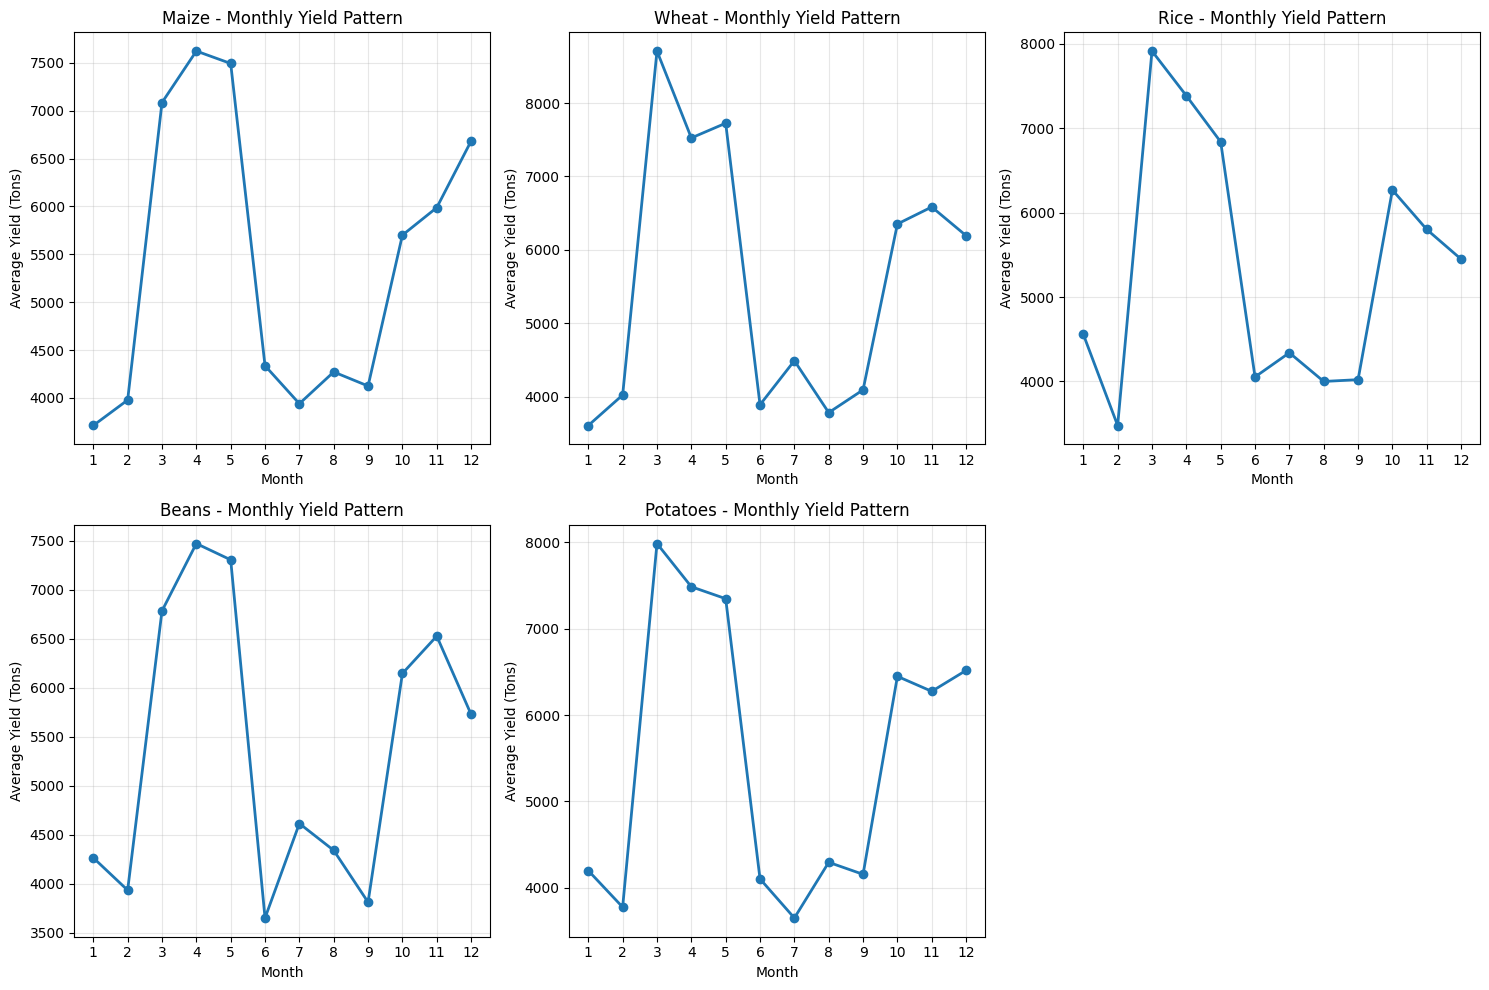

In [33]:
seasonal_yield = KARI_data.groupby(['Crop', 'Month'])['Yield_Tons'].mean().reset_index()

plt.figure(figsize=(15, 10))
for i, crop in enumerate(KARI_data['Crop'].unique()):
    plt.subplot(2, 3, i+1)
    crop_data = seasonal_yield[seasonal_yield['Crop'] == crop]
    plt.plot(crop_data['Month'], crop_data['Yield_Tons'], marker='o', linewidth=2)
    plt.title(f'{crop} - Monthly Yield Pattern')
    plt.xlabel('Month')
    plt.ylabel('Average Yield (Tons)')
    plt.xticks(range(1, 13))
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**The table above recapitulate the 3 best months of harvesting to have good production.**

In [34]:
optimal_planting = KARI_data.groupby(['Crop', 'Month'])['Yield_Tons'].mean().reset_index()
best_months = optimal_planting.loc[optimal_planting.groupby('Crop')['Yield_Tons'].idxmax()]

print("Optimal Harvesting Months (Based on Highest Yields):")
print(best_months[['Crop', 'Month', 'Yield_Tons']].round(2))

Optimal Harvesting Months (Based on Highest Yields):
        Crop  Month  Yield_Tons
3      Beans      4     7471.56
15     Maize      4     7622.15
26  Potatoes      3     7987.47
38      Rice      3     7913.38
50     Wheat      3     8707.43


In [35]:
optimal_planting = KARI_data.groupby(['Crop', 'Month'])['Yield_Tons'].mean().reset_index()
#best_months = optimal_planting.loc[optimal_planting.groupby('Crop')['Yield_Tons'].idxmax()]
top3_months = (
    optimal_planting
    .groupby('Crop', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'Yield_Tons'))
    .sort_values(['Crop', 'Yield_Tons'], ascending=[True, False])
    .reset_index(drop=True)
)
top3_months

/tmp/ipykernel_183054/3814076847.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'Yield_Tons'))


,Crop,Month,Yield_Tons
0,Beans,4,7471.556667
1,Beans,5,7305.596667
2,Beans,3,6784.543333
3,Maize,4,7622.146667
4,Maize,5,7492.496667
5,Maize,3,7083.953333
6,Potatoes,3,7987.473333
7,Potatoes,4,7487.116667
8,Potatoes,5,7348.876667
9,Rice,3,7913.380000


In [36]:
KARI_data['Yield_per_Hectare'] = KARI_data['Yield_Tons'] / KARI_data['Area_Planted_Hectares']
productivity_trends = KARI_data.groupby(['Year', 'Crop'])['Yield_per_Hectare'].mean().reset_index()

print("Productivity Trends (Yield per Hectare):")
for crop in KARI_data['Crop'].unique():
    crop_prod = productivity_trends[productivity_trends['Crop'] == crop]
    first_year = crop_prod['Yield_per_Hectare'].iloc[0]
    last_year = crop_prod['Yield_per_Hectare'].iloc[-1]
    change = ((last_year - first_year) / first_year) * 100
    trend = "Improving" if change > 0 else "Declining"
    print(f"{crop}: {trend} ({change:+.1f}% change from {first_year:.2f} to {last_year:.2f} tons/ha)")
print("\n")

Productivity Trends (Yield per Hectare):
Maize: Improving (+17.2% change from 2.13 to 2.49 tons/ha)
Wheat: Improving (+10.4% change from 2.04 to 2.25 tons/ha)
Rice: Improving (+4.4% change from 2.02 to 2.11 tons/ha)
Beans: Improving (+0.1% change from 2.15 to 2.15 tons/ha)
Potatoes: Improving (+45.2% change from 1.82 to 2.64 tons/ha)




# **Recapitulatif of best choice of crop county and period**

The best period to sell is between June and September, as prices are highest across all counties.
Harvesting should be done between March and May to achieve good yields.

# **Fertilizer impact analysis**


In [37]:
# Fertilizer impact analysis
fertilizer_impact = KARI_data.groupby('Crop')['Fertilizer_Used_kg'].corr(KARI_data['Yield_Tons']).reset_index(name='Correlation')
fertilizer_impact = fertilizer_impact.sort_values(by='Correlation', ascending=False)
print("\nFertilizer Usage vs Yield Correlation by Crop:")
fertilizer_impact


Fertilizer Usage vs Yield Correlation by Crop:


,Crop,Correlation
0,Beans,0.110030
1,Maize,0.106532
4,Wheat,0.097665
3,Rice,0.055769
2,Potatoes,-0.095509


**As shown by our correlation matrix,**
The correlations between fertilizer usage and yield are very weak for all crops.Fertilizer use does not explain differences in yield.
Other variables (rainfall, temperature, soil quality) might have a stronger effect.

Another explanation can be the insuffusance of used quantity. So, farmers may not adjust fertilizer quantities optimally.

**Let's check the mean usage per ha**

/tmp/ipykernel_183054/3369865421.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Crop Type')


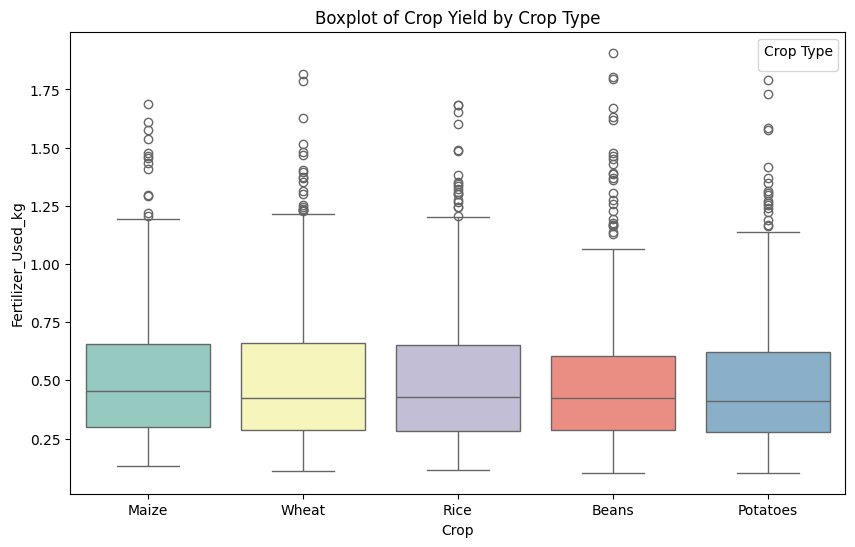

In [38]:
# Grouped Boxplot using Seaborn
df['mean_fertilizer'] = df['Fertilizer_Used_kg'] / df['Area_Planted_Hectares']
plt.figure(figsize=(10,6))
sn.boxplot(x='Crop', y='mean_fertilizer', hue='Crop', data=df, palette='Set3')
plt.title('Boxplot of Crop Yield by Crop Type')
plt.xlabel('Crop')
plt.ylabel('Fertilizer_Used_kg')
plt.legend(title='Crop Type')
plt.show()

**The variation in fertilizer applied per hectare is not very large. Farmers are using almost the same amount across fields.**

Let\'s divide fertizer in 8 groups and make analysis:

**- lower than 0.2**

**- between 0.2 and 0.3**

**- between 0.3 and 0.4**

**- between 0.4 and 0.5**

**- between 0.5 and 0.6**

**- between 0.6 and 0.7**

**- between 0.7 and 0.8**

**- greater than 0.8**

In [39]:
df['mean_fertilizer'].min()

np.float64(0.1029429501869497)

In [40]:
df['mean_fertilizer'].max()

np.float64(1.9079903147699757)

In [41]:
df[df['mean_fertilizer']<0.3].count()

Date                     514
County                   514
Crop                     514
Yield_Tons               514
Rainfall_mm              514
Temperature_C            514
Price_KSH_per_kg         514
Area_Planted_Hectares    514
Fertilizer_Used_kg       514
Month                    514
Year                     514
Season                   514
Quarter                  514
Yield_per_Hectare        514
mean_fertilizer          514
dtype: int64

In [42]:
def def_quantity_fertilizer_group(df):
    df['quantity_fertilizer_group'] = ''
    
    df.loc[df['mean_fertilizer'] < 0.2, 'quantity_fertilizer_group'] = '0.0-0.2'
    df.loc[(df['mean_fertilizer'] >= 0.2) & (df['mean_fertilizer'] < 0.3), 'quantity_fertilizer_group'] = '0.2-0.3'
    df.loc[(df['mean_fertilizer'] >= 0.3) & (df['mean_fertilizer'] < 0.4), 'quantity_fertilizer_group'] = '0.3-0.4'
    df.loc[(df['mean_fertilizer'] >= 0.4) & (df['mean_fertilizer'] < 0.5), 'quantity_fertilizer_group'] = '0.4-0.5'
    df.loc[(df['mean_fertilizer'] >= 0.5) & (df['mean_fertilizer'] < 0.6), 'quantity_fertilizer_group'] = '0.5-0.6'
    df.loc[(df['mean_fertilizer'] >= 0.6) & (df['mean_fertilizer'] < 0.7), 'quantity_fertilizer_group'] = '0.6-0.7'
    df.loc[(df['mean_fertilizer'] >= 0.7) & (df['mean_fertilizer'] < 0.8), 'quantity_fertilizer_group'] = '0.7-0.8'
    df.loc[df['mean_fertilizer'] >= 0.8, 'quantity_fertilizer_group'] = '>0.8'

    return df


In [43]:
def_quantity_fertilizer_group(df)

,Date,County,Crop,Yield_Tons,Rainfall_mm,Temperature_C,Price_KSH_per_kg,Area_Planted_Hectares,Fertilizer_Used_kg,Month,Year,Season,Quarter,Yield_per_Hectare,mean_fertilizer,quantity_fertilizer_group
0,2019-01-31,Nakuru,Maize,2650.6,65.0,21.5,37.6,3909.0,1519.1,1,2019,Dry season,2019Q1,0.678076,0.388616,0.3-0.4
1,2019-01-31,Nakuru,Wheat,1426.7,0.7,22.3,83.5,3657.5,1409.9,1,2019,Dry season,2019Q1,0.390075,0.385482,0.3-0.4
2,2019-01-31,Nakuru,Rice,4761.3,17.5,21.3,78.1,4843.6,877.7,1,2019,Dry season,2019Q1,0.983009,0.181208,0.0-0.2
3,2019-01-31,Nakuru,Beans,5276.8,54.2,17.6,61.2,2143.3,1610.4,1,2019,Dry season,2019Q1,2.461998,0.751365,0.7-0.8
4,2019-01-31,Nakuru,Potatoes,5534.0,34.5,24.3,56.8,2671.1,838.7,1,2019,Dry season,2019Q1,2.071806,0.313990,0.3-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2023-12-31,Machakos,Maize,8465.1,101.9,23.6,61.0,2651.0,1458.8,12,2023,Dry season,2023Q4,3.193172,0.550283,0.5-0.6
1796,2023-12-31,Machakos,Wheat,6100.9,107.5,26.6,50.2,2003.2,1224.7,12,2023,Dry season,2023Q4,3.045577,0.611372,0.6-0.7
1797,2023-12-31,Machakos,Rice,9206.1,78.3,15.4,52.2,4637.3,941.7,12,2023,Dry season,2023Q4,1.985228,0.203071,0.2-0.3
1798,2023-12-31,Machakos,Beans,5205.6,102.3,22.3,53.3,2343.0,1960.1,12,2023,Dry season,2023Q4,2.221767,0.836577,>0.8


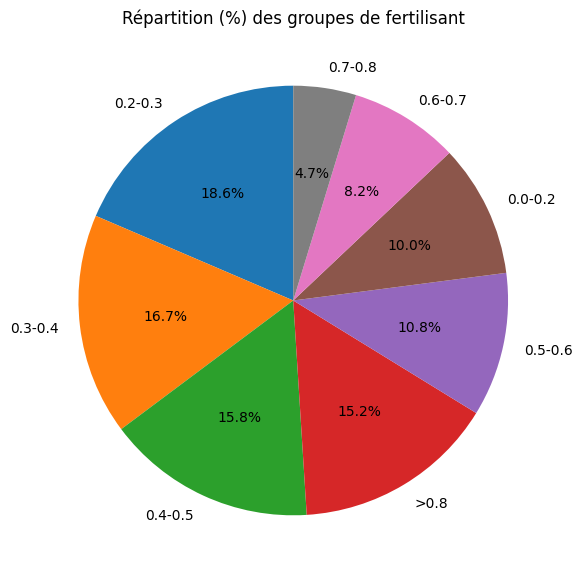

In [44]:
# calcul du taux
group_counts = df['quantity_fertilizer_group'].value_counts(normalize=True)

plt.figure(figsize=(6,6))
plt.pie(
    group_counts.values,
    labels=group_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Répartition (%) des groupes de fertilisant")
plt.tight_layout()
plt.show()

In [45]:
df.columns

Index(['Date', 'County', 'Crop', 'Yield_Tons', 'Rainfall_mm', 'Temperature_C',
       'Price_KSH_per_kg', 'Area_Planted_Hectares', 'Fertilizer_Used_kg',
       'Month', 'Year', 'Season', 'Quarter', 'Yield_per_Hectare',
       'mean_fertilizer', 'quantity_fertilizer_group'],
      dtype='object')

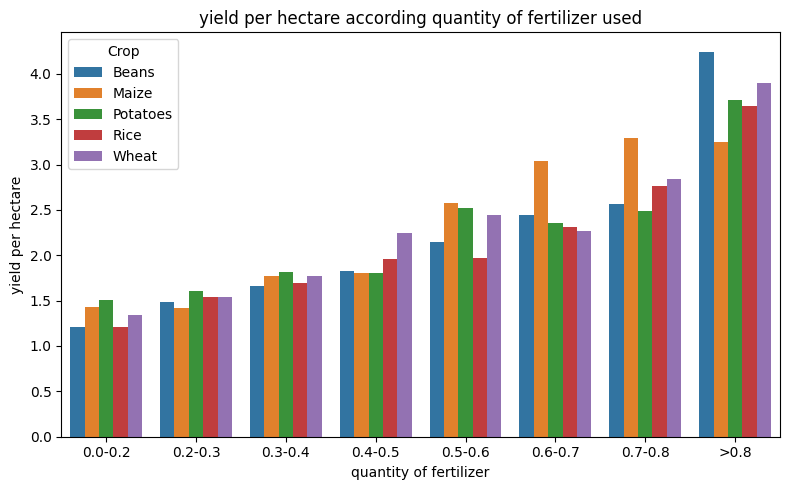

In [46]:
group_mean = (df.groupby(['quantity_fertilizer_group', 'Crop'])['Yield_per_Hectare'].mean().reset_index())

plt.figure(figsize=(8,5))
#plt.bar(group_mean.index, group_mean.values)
sn.barplot(data=group_mean, x='quantity_fertilizer_group', y='Yield_per_Hectare', hue='Crop', errorbar=None)


plt.xlabel('quantity of fertilizer')
plt.ylabel('yield per hectare')
plt.title('yield per hectare according quantity of fertilizer used')

plt.tight_layout()
plt.show()


**The mean yield per hectare increase with quantity of fertizer used.
To increase production, we must increase quantity of fertizer.**

# Conclusion of the Project

## Yield Prediction
Yield is highest when harvesting is done during periods of heavy rainfall.  
To achieve good yields, harvesting should be done **between March and May**.

## Market Volatility
Prices fluctuate inversely with yield:  
- When yield increases, prices decrease.  
- When yield decreases, prices increase.  

The best period to sell is **between June and September**, when prices are highest across all counties.

## Resource Optimization
Increasing the amount of fertilizer significantly improves yield for each crop.

Recommended fertilizer quantities:
- **Beans, potatoes, wheat, and rice**: at least **0.8 kg/ha**
- **Maize**: at least **0.6 kg/ha**

## Regional Variations
Yield does not vary much across counties.

### If you are in a county, we recommend the following crops:
- **Nakuru**: Wheat  
- **Trans Nzoia**: Potatoes  
- **Uasin**: Wheat  
- **Kiambu**: Wheat, potatoes  
- **Machakos**: Beans  

### If you know the crop but not the region, we recommend the following counties:
- **Wheat**: Meru, Uasin  
- **Maize**: Kiambu, Uasin  
- **Beans**: Nakuru, Machakos  
- **Potatoes**: Trans Nzoia  
